<img src="https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width="500">
<h1 align="center"><font size="7"><strong>Final Project 4</strong></font></h1>

------------------------------------------------

HACKTIV8 - PYTHON FOR DATA SCIENCE

------------------------------------------------

# Kelompok 2 - PYTN KS 019

1. Nur Ishmawati
2. Dyah Ayu Kusuma Wardhani
3. ChristopherBernard S. H
4. Ahmat Zainul M


# __A. INTRODUCTION__
-----------------

Final Project 4 ini dibuat guna mengevaluasi konsep Clustering sebagai berikut:
- Mampu memahami konsep Clustering dengan menggunakan Scikit-Learn
- Mampu mempersiapkan data untuk digunakan dalam Clustering
- Mampu mengimplementasikan Clustering pada data yang diberikan

Database (https://www.kaggle.com/datasets/arjunbhasin2013/ccdata) ini berisi transaksi pengguna kartu kredit sebanyak 9000 orang selama 6 bulan. Data ini memiliki 18 atribut.

Metode pendekatan model statistik dan machine learning untuk melakukan prediksi keselamatan pasien dari penyakit jantung akan dilakukan pada project ini. Metode yang digunakan untuk memprekdiksi keselamatan pasien dari penyakit jantung adalah Logistic Regression, K-Nearest Neighbors, Support Virtual Machine, Decision Tree, Random Forest, dan Naive Bayes.

Objektif yang ingin dicapai dari pemodelan pada final project 4 ini adalah:

- Melakukan dan menentukan jumlah clustering pada dataset transaksi pengguna kartu kredit untuk mengetahui kelompok-kelompok yang memiliki karakteristik data yang sama dengan menggunakan algoritma clustering.
- Mengetahui sifat/karakteristik ataupun segmentasi dari masing-masing cluster pelanggan/pengguna kartu kredit yang terbentuk.

# __B. IMPORT LIBRARY__
----------------------------

In [1]:
# Import Library Dataframe
import pandas as pd
import numpy as np

# Import Library untuk Visualisasi
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import scipy

from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import DBSCAN

from scipy.stats.mstats import winsorize
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,f1_score, precision_score, recall_score, mean_squared_error

# Import Library untuk ignore warning
import warnings
warnings.filterwarnings('ignore')

# For API Adjustment
import pickle

# C. DATA LOADING
-------------------

## 1. Memanggil Dataset

In [2]:
df = pd.read_csv('CC GENERAL.csv')
pd.set_option('display.max.columns',None)       # Untuk melihat semua kolom

# Melihat 5 data paling atas
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
# Melihat 5 data terbawah
df.tail()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.50,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.00,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.25,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.25,6
8949,C19190,372.708075,0.666667,1093.25,1093.25,0.00,127.040008,0.666667,0.666667,0.000000,0.333333,2,23,1200.0,63.165404,88.288956,0.00,6


In [4]:
df

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


**``Keterangan dataset:``**

Database ini terdiri dari ``18 atribut`` yang memiliki ``8950 baris``. Dimana memuat data transaksi pengguna kartu kredit selama 6 bulan.
1. ``CUSTID`` - Identitas pemegang Kartu Kredit (Categorical)
2. ``BALANCE`` - Jumlah saldo yang tersisa di akun mereka untuk melakukan pembelian
3. ``BALANCEFREQUENCY`` - Seberapa sering Saldo diperbarui, beri skor antara 0 dan 1 (1 = sering diperbarui, 0 = tidak sering diperbarui)
4. ``PURCHASES`` - Jumlah pembelian yang dilakukan dari akun
5. ``ONEOFFPURCHASES`` - Jumlah pembelian maksimum yang dilakukan dalam satu kali transaksi
6. ``INSTALLMENTSPURCHASES`` - Jumlah pembelian yang dilakukan dengan cicilan
7. ``CASHADVANCE`` - Uang tunai di muka yang diberikan oleh pengguna
8. ``PURCHASESFREQUENCY`` - Seberapa sering Pembelian dilakukan, beri skor antara 0 dan 1 (1 = sering dibeli, 0 = tidak sering dibeli)
9. ``ONEOFFPURCHASESFREQUENCY`` - Seberapa sering Pembelian dilakukan dalam sekali jalan (1 = sering dibeli, 0 = tidak sering dibeli)
10. ``PURCHASESINSTALLMENTSFREQUENCY`` - Seberapa sering pembelian dengan cicilan dilakukan (1 = sering, 0 = tidak sering)
11. ``CASHADVANCEFREQUENCY`` - Seberapa sering uang muka dibayarkan
12. ``CASHADVANCETRX`` - Jumlah Transaksi yang dilakukan dengan "Uang Tunai di Muka"
13. ``PURCHASESTRX`` - Jumlah transaksi pembelian yang dilakukan
14. ``CREDITLIMIT`` - Limit Kartu Kredit untuk pengguna
15. ``PAYMENTS`` - Jumlah Pembayaran yang dilakukan oleh pengguna
16. ``MINIMUM_PAYMENTS`` - Jumlah minimum pembayaran yang dilakukan oleh pengguna
17. ``PRCFULLPAYMENT`` - Persentase pembayaran penuh yang dibayarkan oleh pengguna
18. ``TENURE`` - Jangka waktu layanan kartu kredit untuk pengguna

## 2. Melihat Jumlah Baris & Kolom

In [5]:
df.shape

(8950, 18)

In [6]:
df.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

Dataset ini terdiri dari 18 atribut yang memiliki 8950 baris.

## 3. Melihat Info dan Tipe Data 

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [8]:
# Mengecek tipe data
df.dtypes

CUST_ID                              object
BALANCE                             float64
BALANCE_FREQUENCY                   float64
PURCHASES                           float64
ONEOFF_PURCHASES                    float64
INSTALLMENTS_PURCHASES              float64
CASH_ADVANCE                        float64
PURCHASES_FREQUENCY                 float64
ONEOFF_PURCHASES_FREQUENCY          float64
PURCHASES_INSTALLMENTS_FREQUENCY    float64
CASH_ADVANCE_FREQUENCY              float64
CASH_ADVANCE_TRX                      int64
PURCHASES_TRX                         int64
CREDIT_LIMIT                        float64
PAYMENTS                            float64
MINIMUM_PAYMENTS                    float64
PRC_FULL_PAYMENT                    float64
TENURE                                int64
dtype: object

Dataset ini terdiri dari 18 atribut yang memiliki 8950 baris, dengan ``tipe data object, float, dan integer``.

In [9]:
# Melihat data unik
df.nunique().sort_values(ascending=True)

TENURE                                 7
BALANCE_FREQUENCY                     43
PURCHASES_INSTALLMENTS_FREQUENCY      47
PRC_FULL_PAYMENT                      47
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
ONEOFF_PURCHASES                    4014
CASH_ADVANCE                        4323
INSTALLMENTS_PURCHASES              4452
PURCHASES                           6203
MINIMUM_PAYMENTS                    8636
PAYMENTS                            8711
BALANCE                             8871
CUST_ID                             8950
dtype: int64

## 4. Melihat Data Kategorik dan Numerik

In [10]:
# Mengecek kolom kategori
categorical_col = [col for col in df.columns if df[col].dtypes =='O']

print('Terdapat {} kolom kategori'.format(len(categorical_col)))
print('Kolom kategori tersebut yaitu:', categorical_col)

Terdapat 1 kolom kategori
Kolom kategori tersebut yaitu: ['CUST_ID']


In [11]:
# Mengecek kolom numerik
numerical_col = [col for col in df.columns if df[col].dtypes !='O']

print('Terdapat {} kolom numerik'.format(len(numerical_col)))
print('Kolom numerik tersebut yaitu:', numerical_col)

Terdapat 17 kolom numerik
Kolom numerik tersebut yaitu: ['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE']


# D. DATA CLEANING
------------------------
Proses mempersiapkan data untuk analisis dengan menghapus atau memodifikasi data yang tidak benar, tidak lengkap, tidak relevan, diduplikasi, atau diformat dengan tidak benar.


## 1. Mengecek Missing Value
    Mengecek missing value pada setiap kolom

In [12]:
#Mengecek apakah terdapat missing value
df.isnull().values.any()    

True

In [13]:
# Memeriksa kolom yang terdapat missing value
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

Pada dataframe terdapat missing value pada kolom MINIMUM_PAYMENTS & CREDIT_LIMIT 

In [14]:
# Menghitung nilai null pada dataset
df.isnull().sum().sum()

314

Total missing value pada data set sebanyak 314

In [15]:
dt_miss = pd.DataFrame({"Missing_Value":df.isna().sum(), "Percentase":df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')})
dt_miss

,Missing_Value,Percentase
CUST_ID,0,0.0 %
BALANCE,0,0.0 %
BALANCE_FREQUENCY,0,0.0 %
PURCHASES,0,0.0 %
ONEOFF_PURCHASES,0,0.0 %
INSTALLMENTS_PURCHASES,0,0.0 %
CASH_ADVANCE,0,0.0 %
PURCHASES_FREQUENCY,0,0.0 %
ONEOFF_PURCHASES_FREQUENCY,0,0.0 %
PURCHASES_INSTALLMENTS_FREQUENCY,0,0.0 %


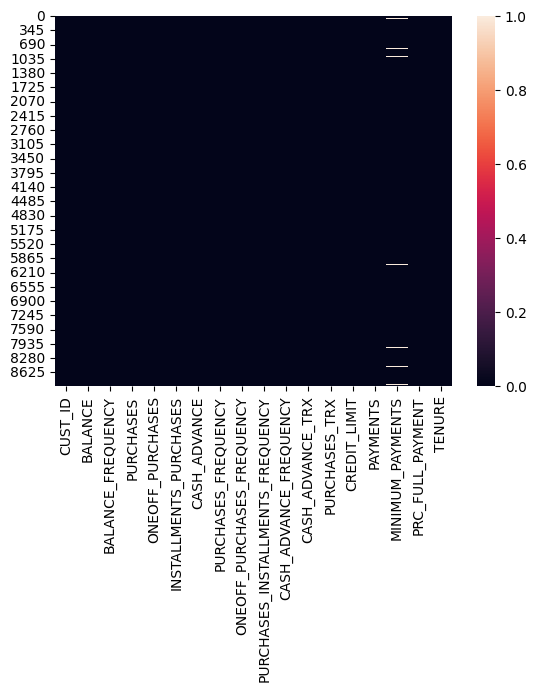

In [16]:
sns.heatmap(df.isnull())
plt.show()

## 2. Melihat Distribusi Kolom Numerik

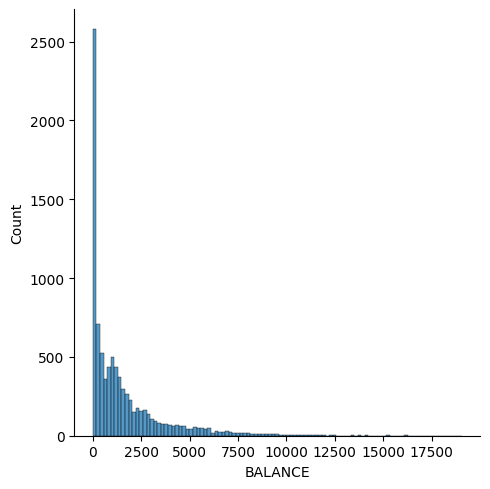

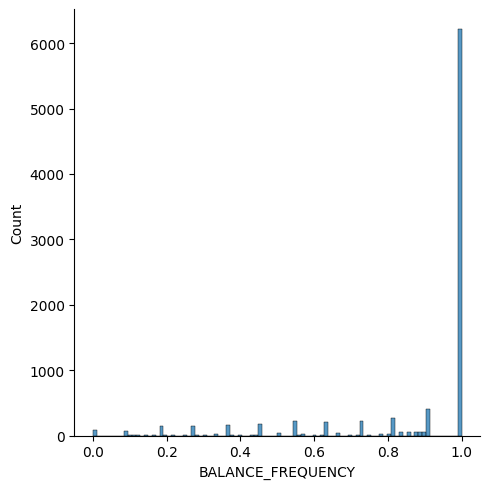

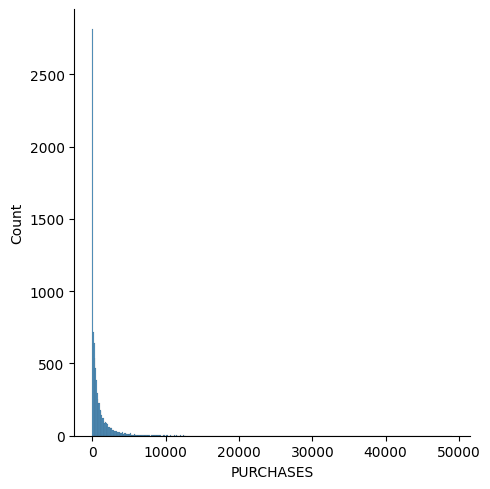

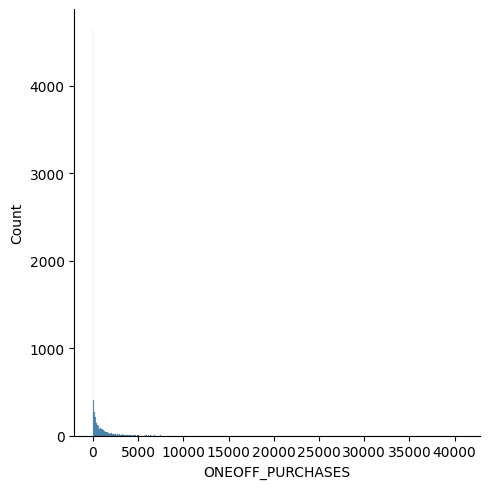

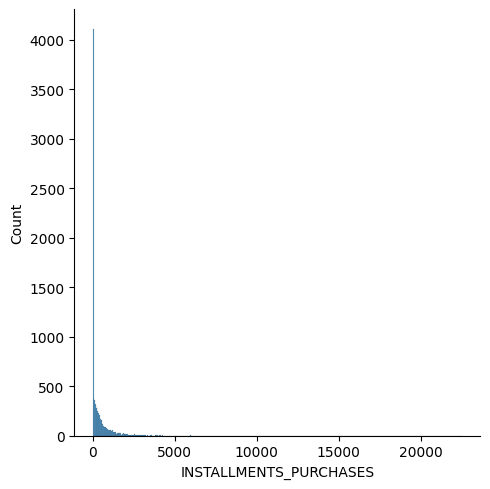

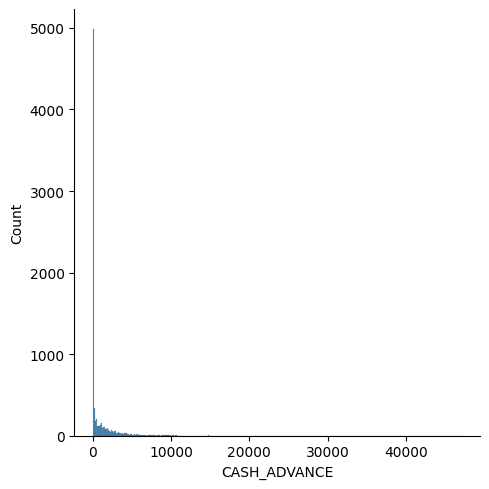

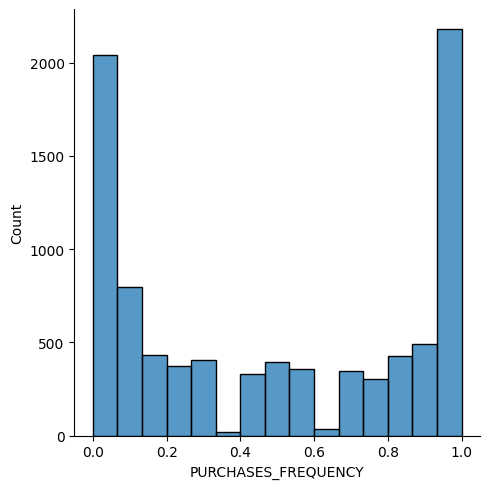

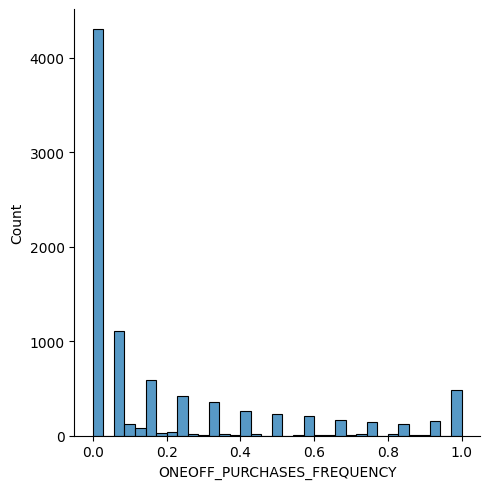

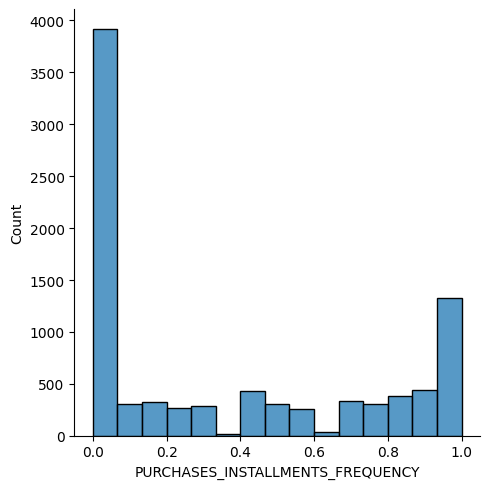

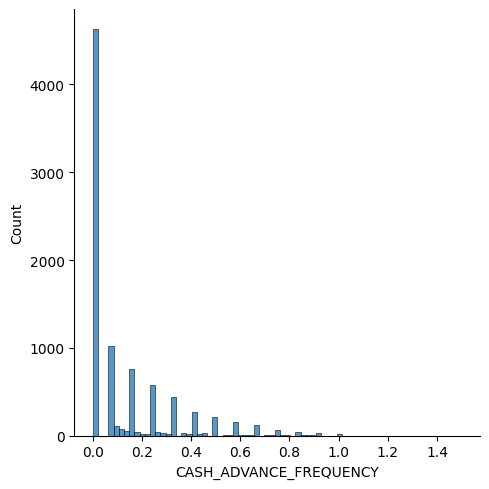

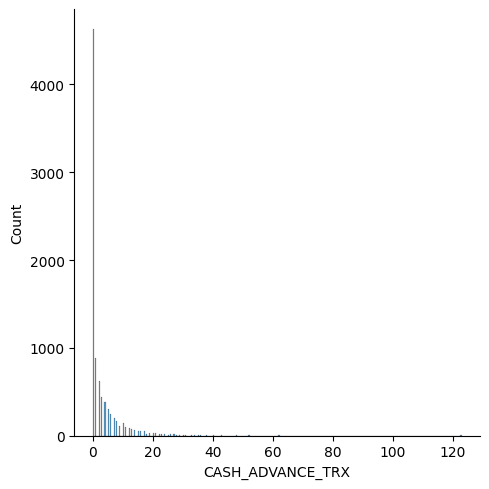

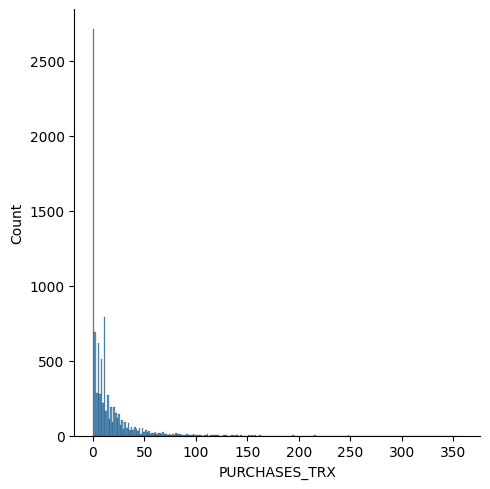

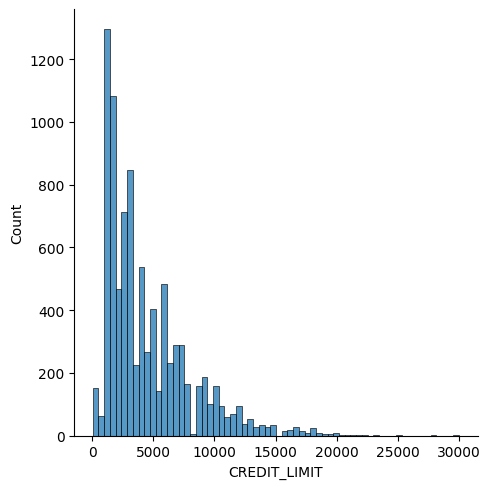

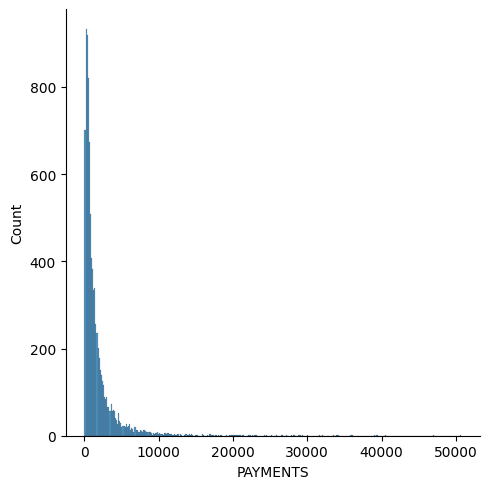

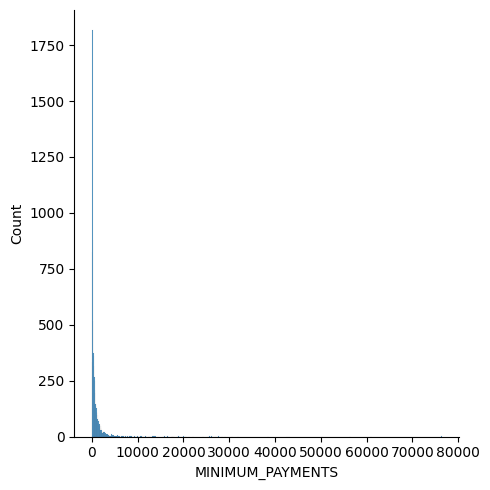

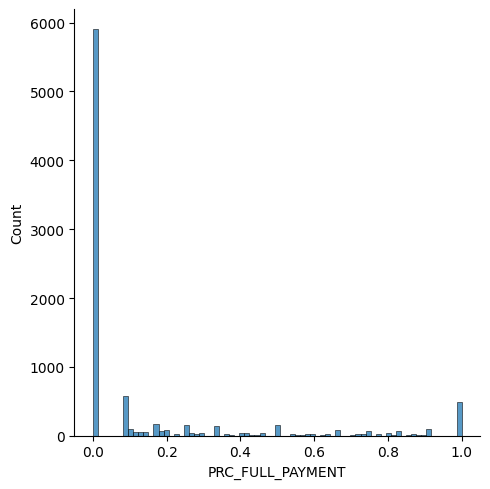

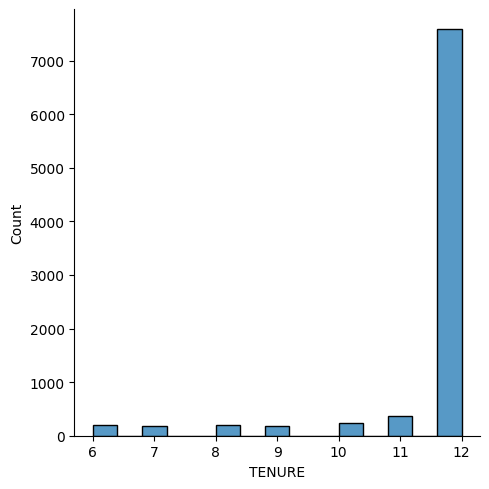

In [17]:
# Menampilkan visualisasi distribusi normal dari kolom numerik
for i in numerical_col:
    sns.displot(df[i])
    plt.show()

Berdasarkan visualisasi di atas terlihat bahwa data masih belum berdistribusi normal dikarenakan masih banyak terdapat data yang null. Sehingga diperlukan untuk mengisinya dengan data mean/median dari setiap kolom yang null. Jika terdapat skewness maka lebih bik pengisian nilai yang kosong pada kolom dengan menggunakan median.

## 3. Mengatasi Missing Value
-----------------------------------------------------------
- untuk mengatasi missing value pada kolom MINIMUM_PAYMENTS akan digunakan nilai median
- sedangkan untuk missing value pada kolom CREDIT_LIMIT akan dihapus pada baris yang memiliki nilai NA

In [18]:
df['MINIMUM_PAYMENTS'] = df['MINIMUM_PAYMENTS'].fillna(df['MINIMUM_PAYMENTS'].median())
df.dropna(subset=['CREDIT_LIMIT'], inplace=True)

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [19]:
# Melihat apakah terdapat missing value
df.isnull().values.any()

False

## 4. Mengecek Duplicate Data


In [20]:
df.duplicated().sum()

0

Pada dataframe tidak terdapat duplicate data 

## 5. Drop Features & Duplikasi Data

In [21]:
df.drop('CUST_ID', axis=1, inplace=True)

In [22]:
df1 = df.copy()

In [23]:
df1.shape

(8949, 17)

## 6. Mengecek Outlier Kolom Numerik

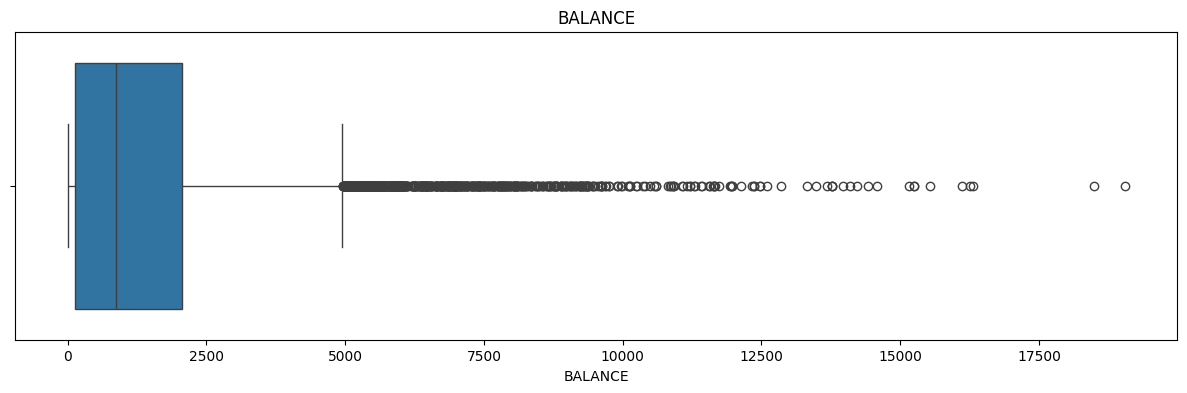

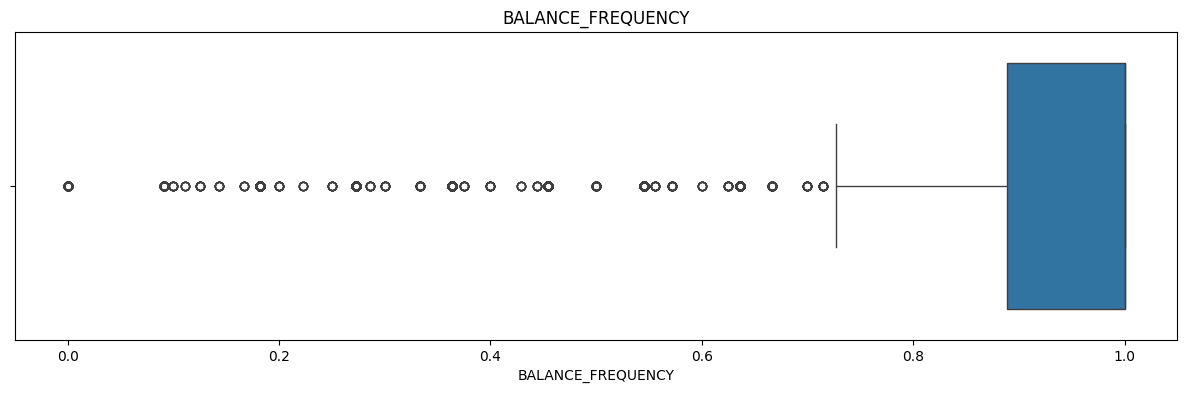

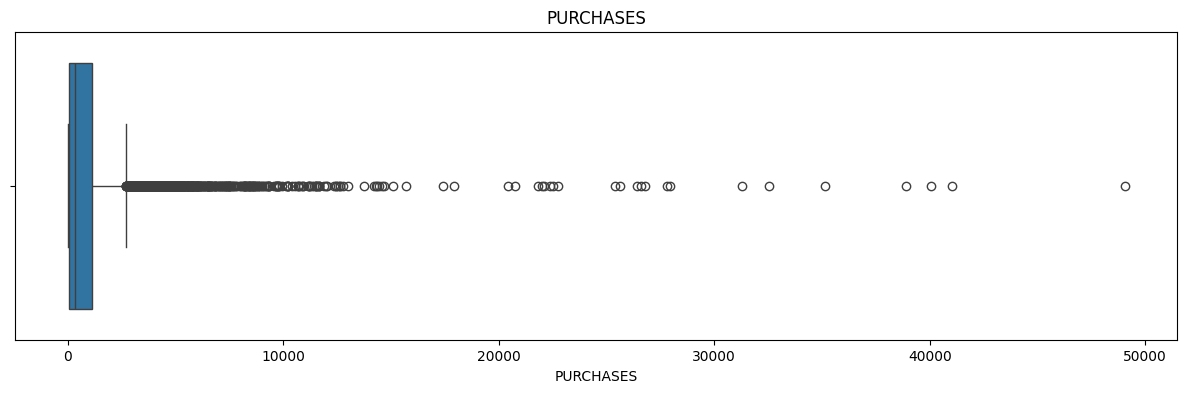

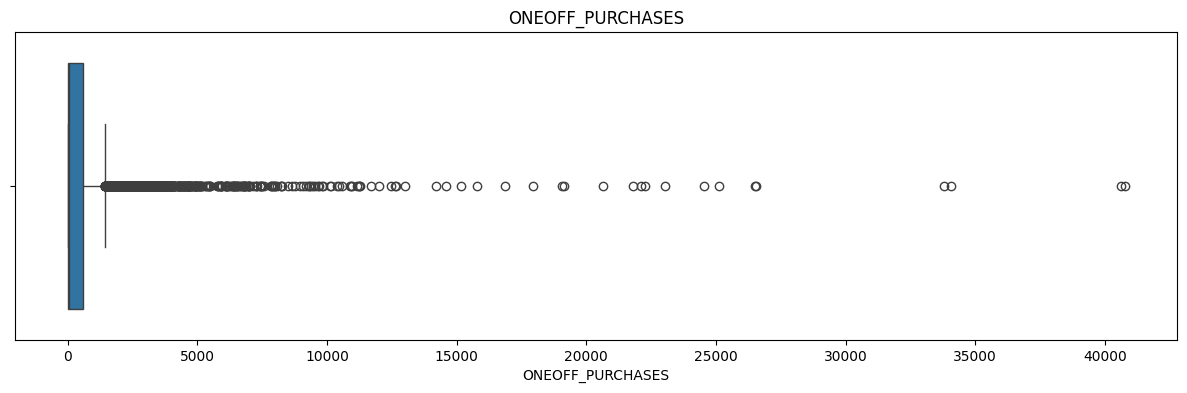

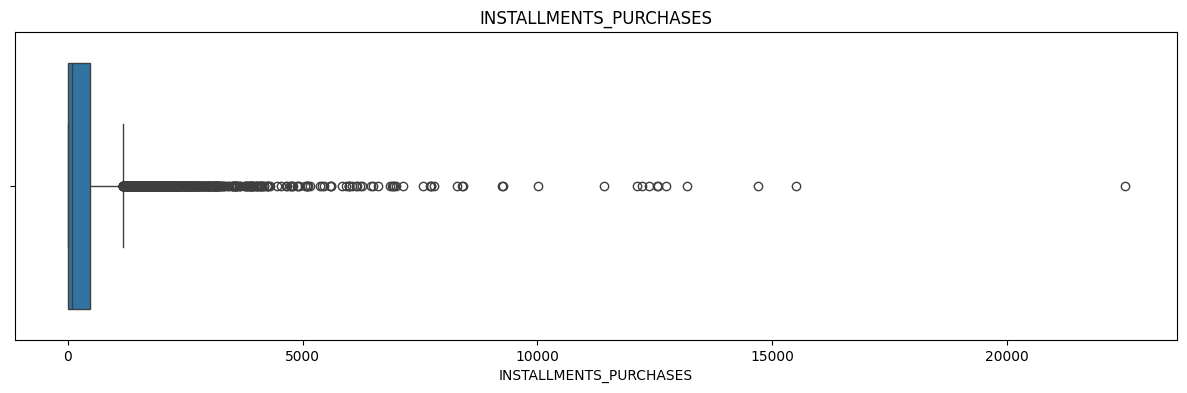

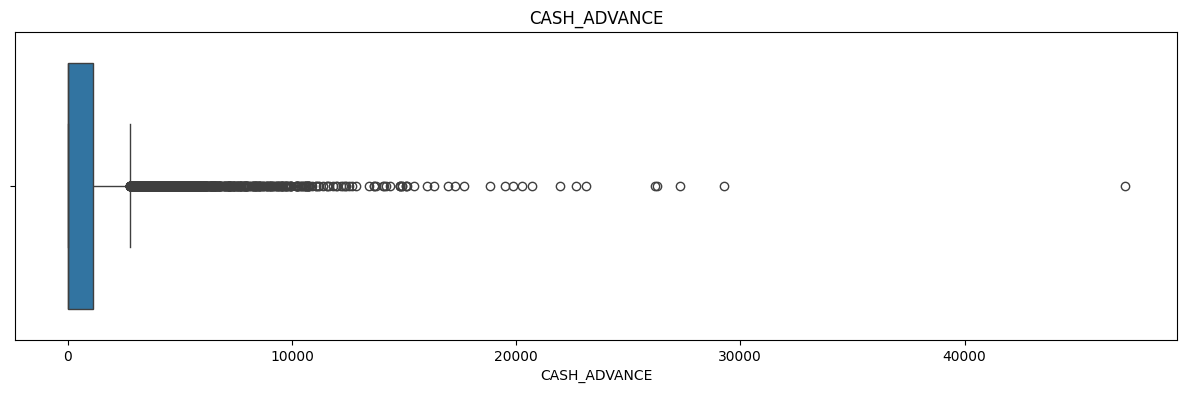

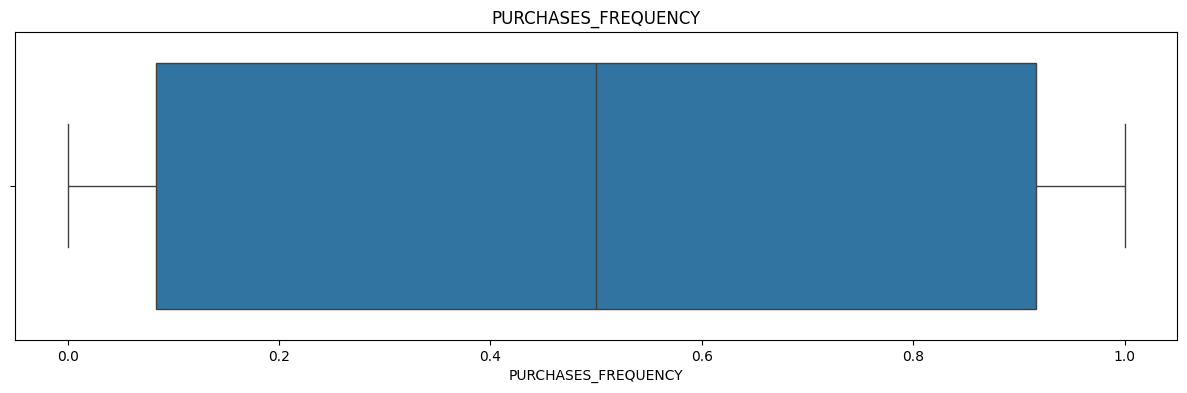

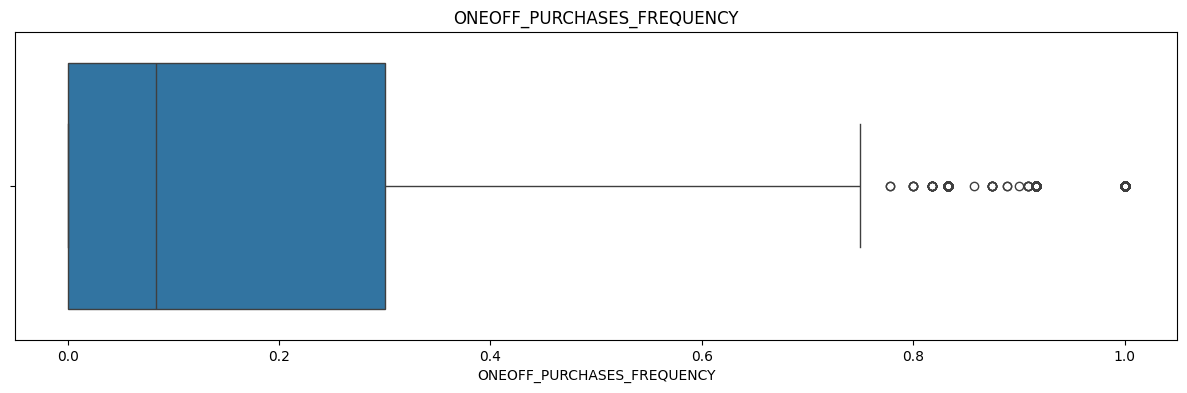

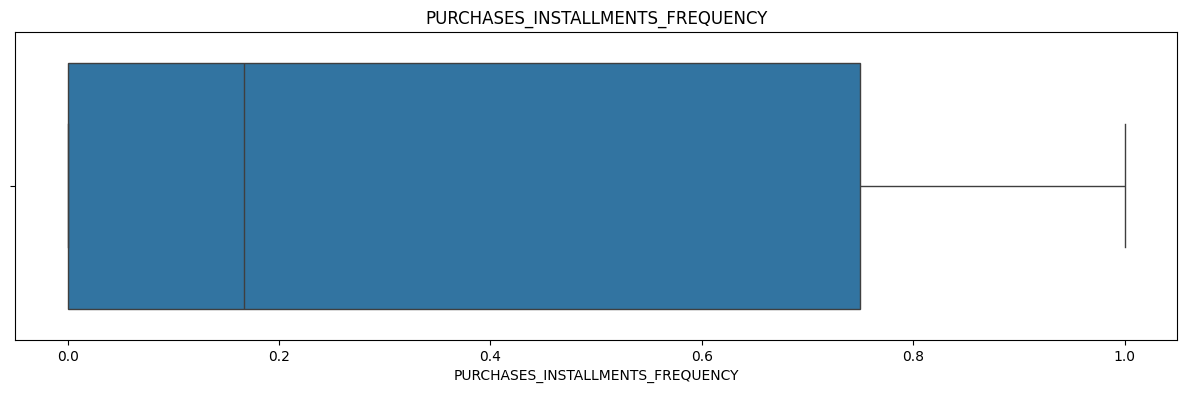

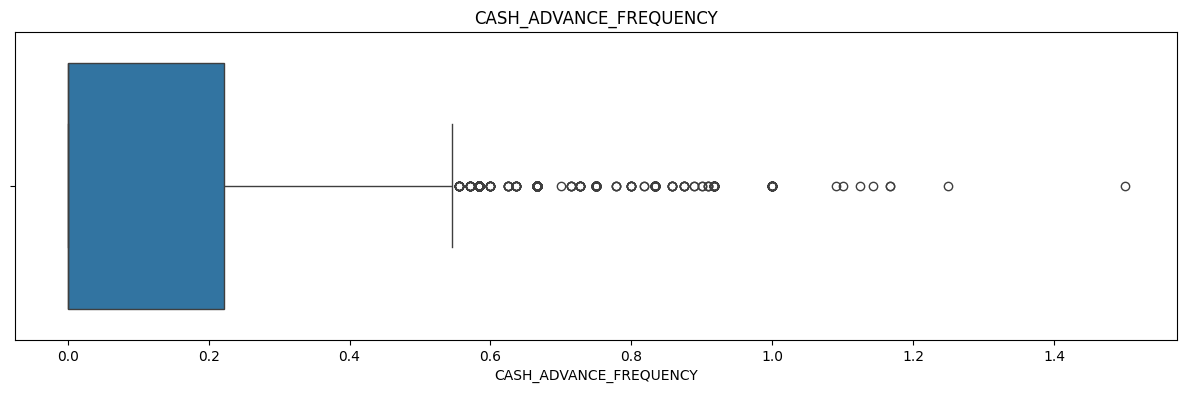

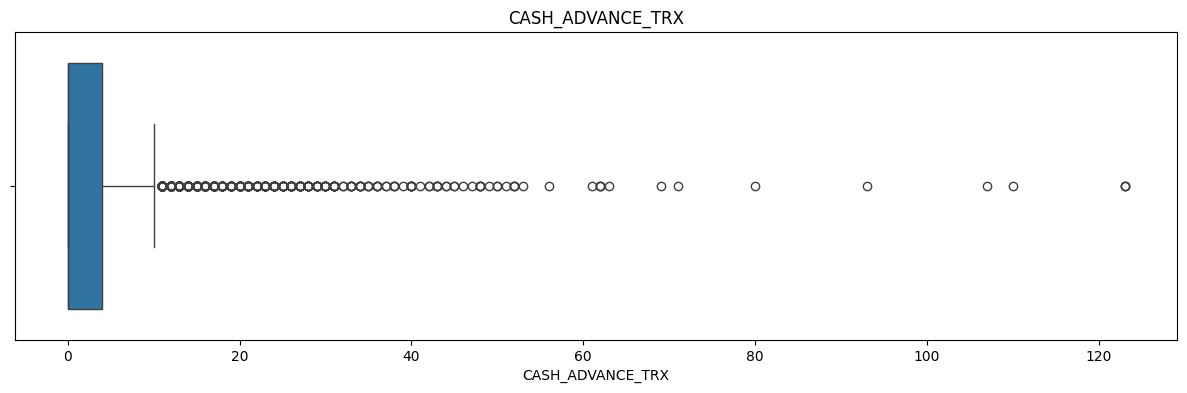

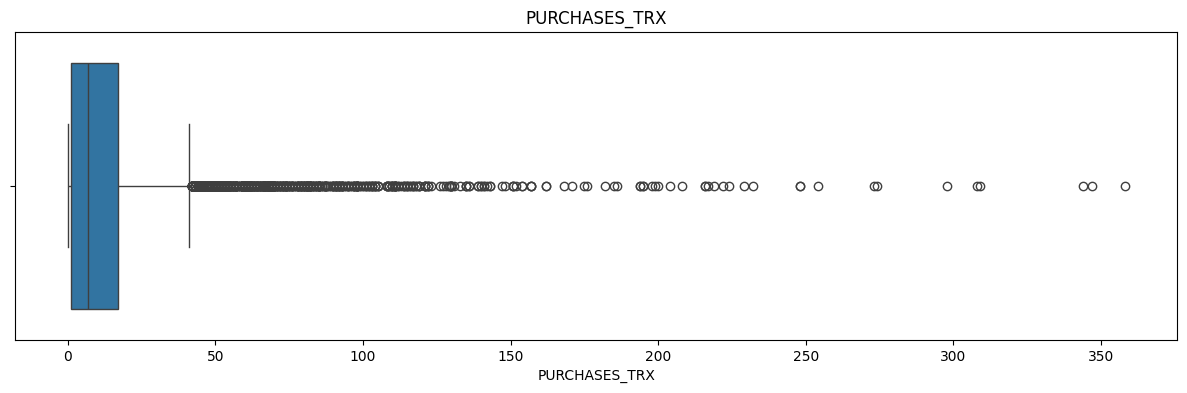

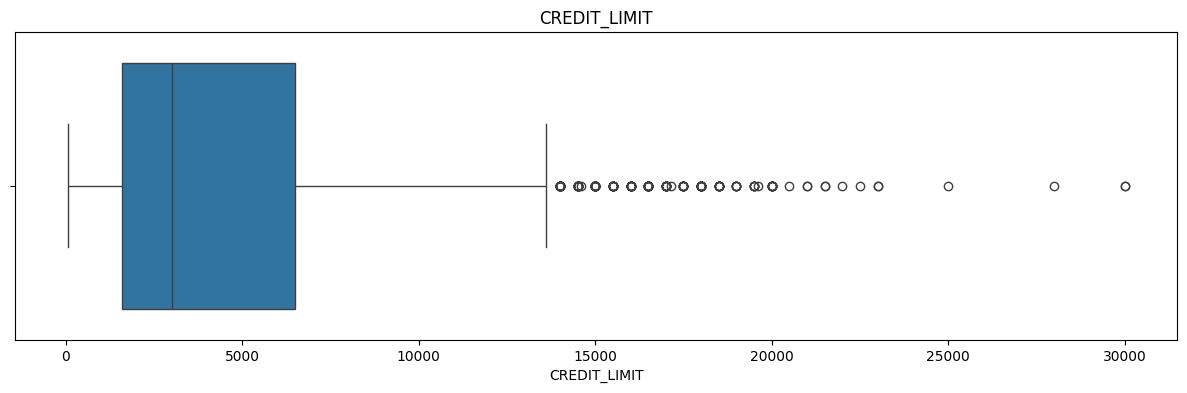

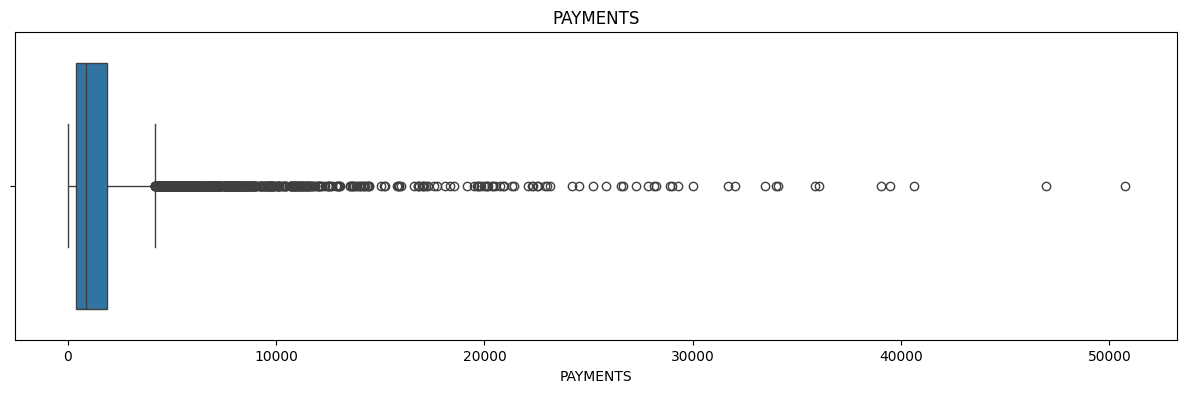

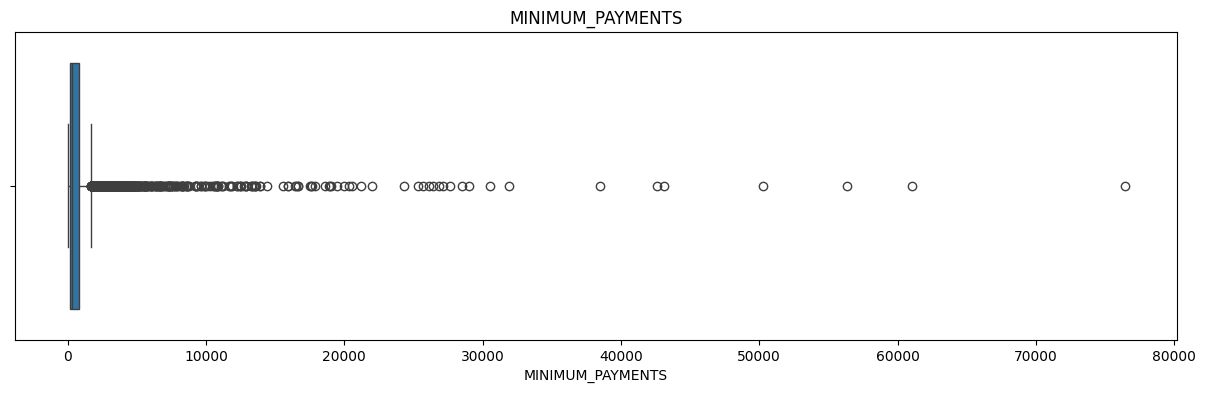

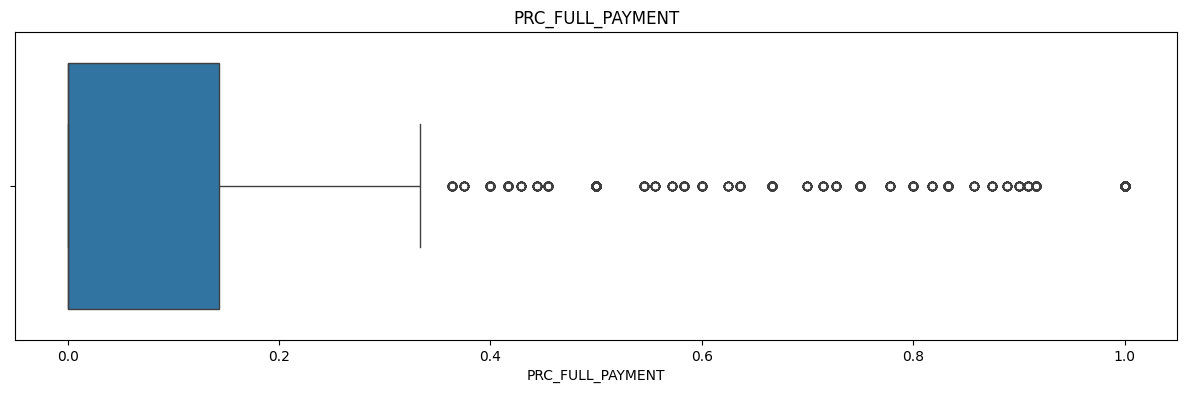

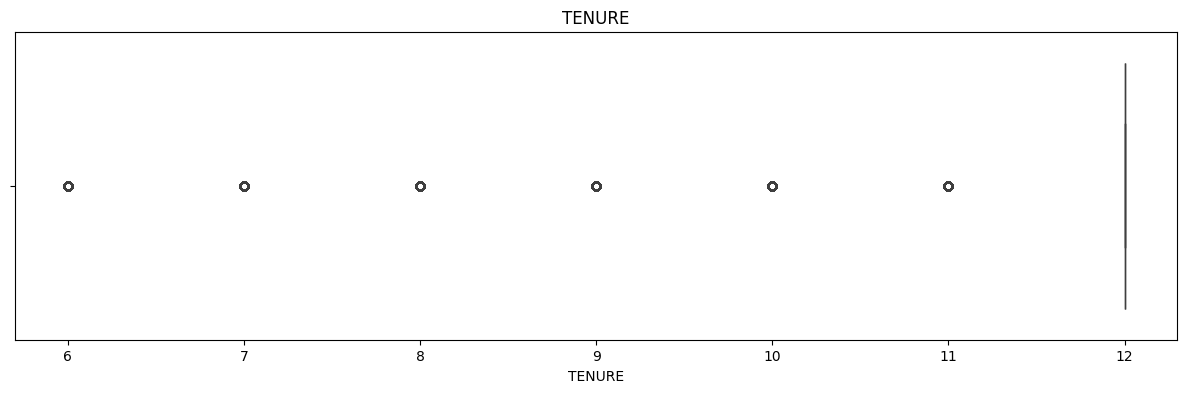

In [24]:
# Megecek outlier menggunakan boxplot
for i in df[numerical_col]:
    plt.figure(figsize=(15,4))
    plt.title(i)
    ax = sns.boxplot(x=df[numerical_col][i])

Terlihat melalui visualisasi boxplot masih terdapat outlier pada kolom.

In [25]:
# Membuat list untuk kolom yang memiliki outliers
outlier_col = ['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 
               'ONEOFF_PURCHASES_FREQUENCY', 'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS', 
               'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT']

# Handling outlier
for col in outlier_col:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3-Q1
    lower_boundary = Q1 - 1.5*IQR
    upper_boundary = Q3 + 1.5*IQR
    df.loc[df[col] < lower_boundary,col] = lower_boundary
    df.loc[df[col] > upper_boundary,col] = upper_boundary

In [26]:
# Lower Limit
Q1 = df[outlier_col].quantile(0.25)
# Upper Limit
Q3 = df[outlier_col].quantile(0.75)

IQR = Q3-Q1

# Lower Limit
low_limit = pd.DataFrame({"Lower Limit": Q1 - 1.5*IQR})
# Upper Limit
up_limit = pd.DataFrame({"Upper Limit":Q3 + 1.5*IQR})

# apply into dataframe
dt_quartile = pd.concat([up_limit, low_limit], axis=1)
dt_quartile

,Upper Limit,Lower Limit
BALANCE,4943.383447,-2760.644817
BALANCE_FREQUENCY,1.166666,0.722223
PURCHASES,2715.725000,-1565.755000
ONEOFF_PURCHASES,1444.575000,-866.745000
INSTALLMENTS_PURCHASES,1171.625000,-702.975000
CASH_ADVANCE,2784.671635,-1670.802981
ONEOFF_PURCHASES_FREQUENCY,0.750000,-0.450000
CASH_ADVANCE_FREQUENCY,0.555555,-0.333333
CASH_ADVANCE_TRX,10.000000,-6.000000
PURCHASES_TRX,41.000000,-23.000000


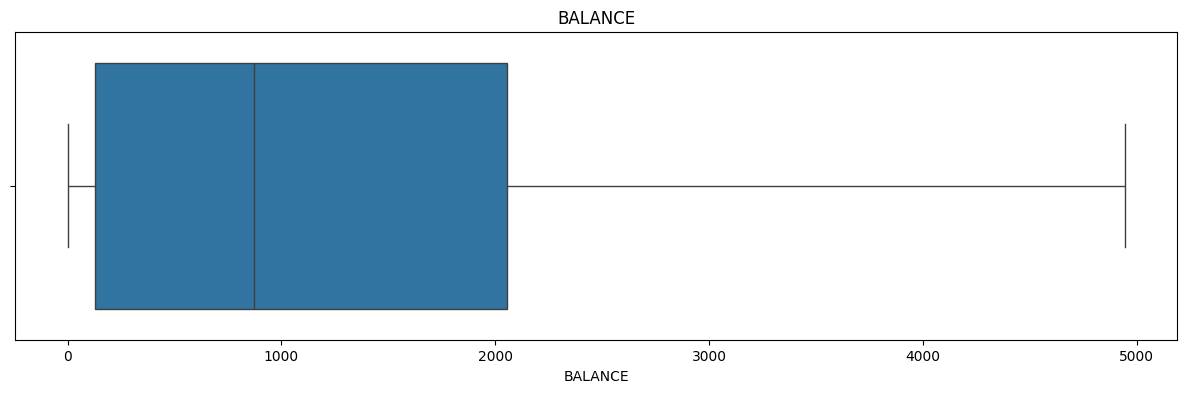

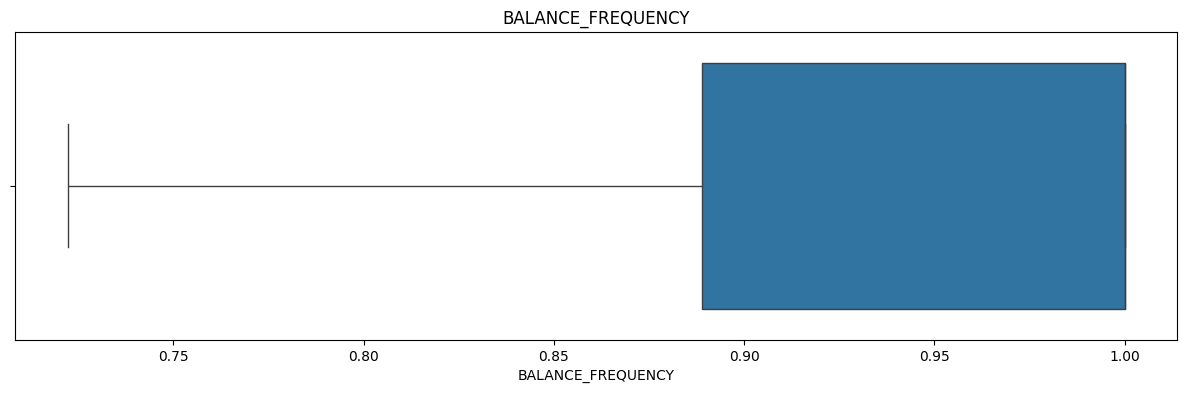

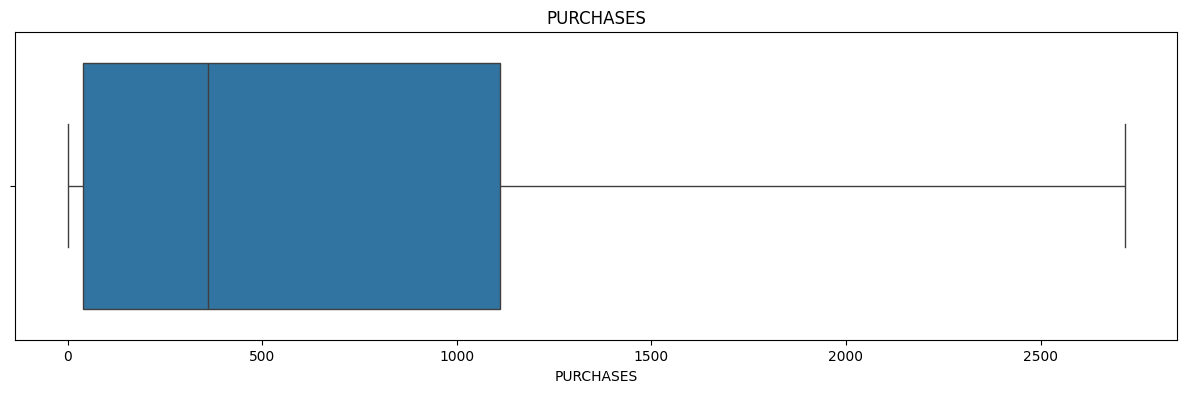

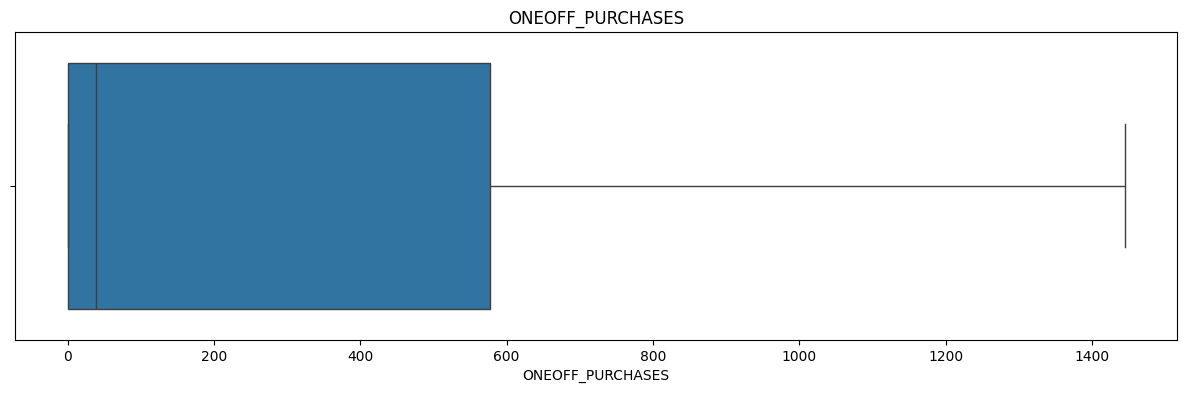

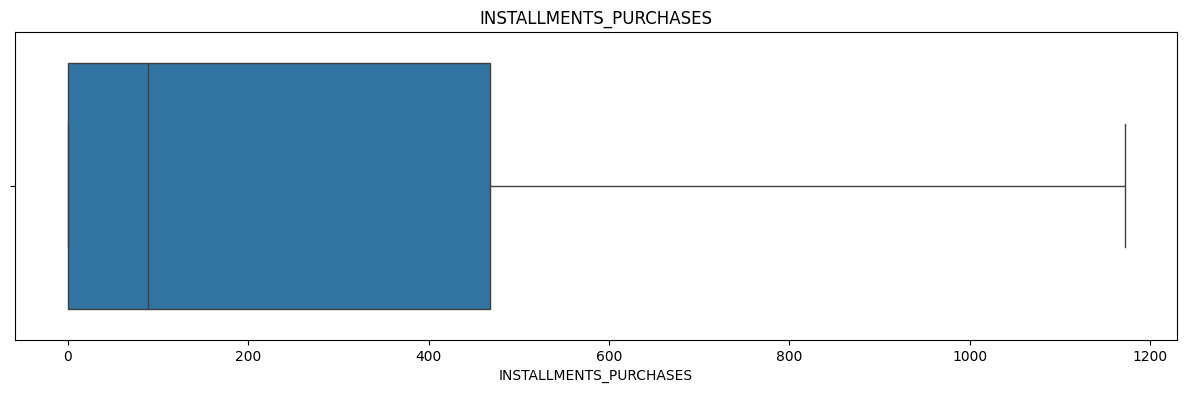

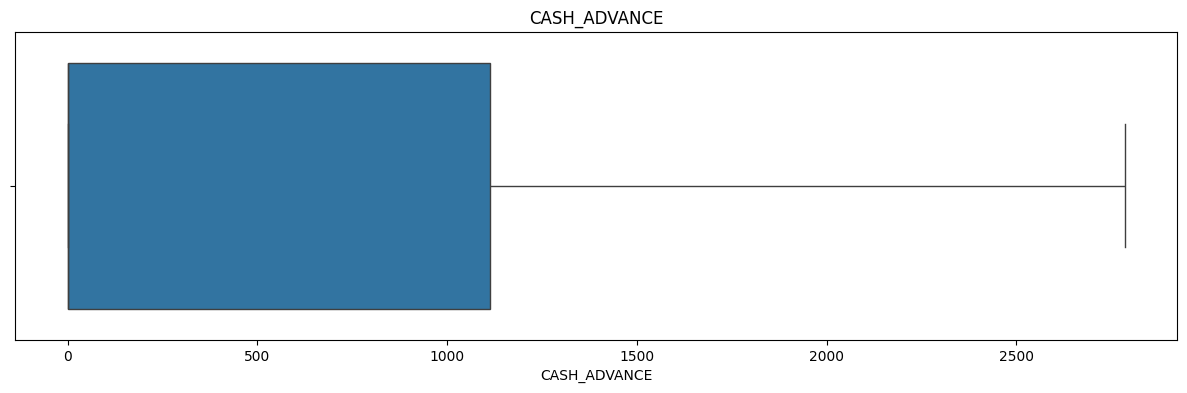

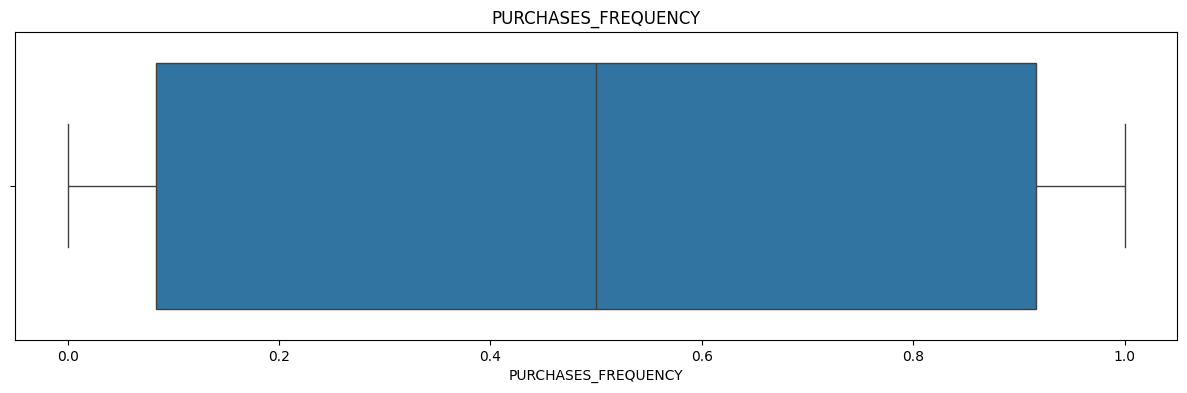

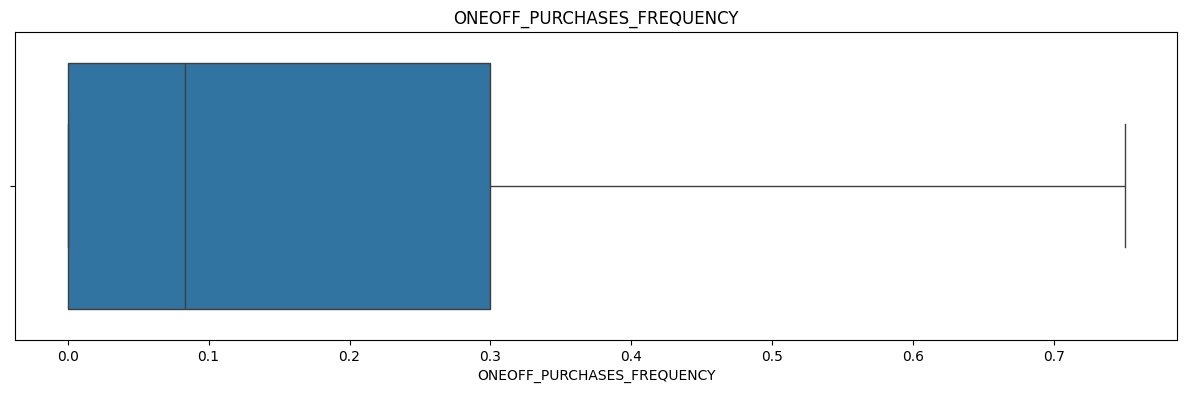

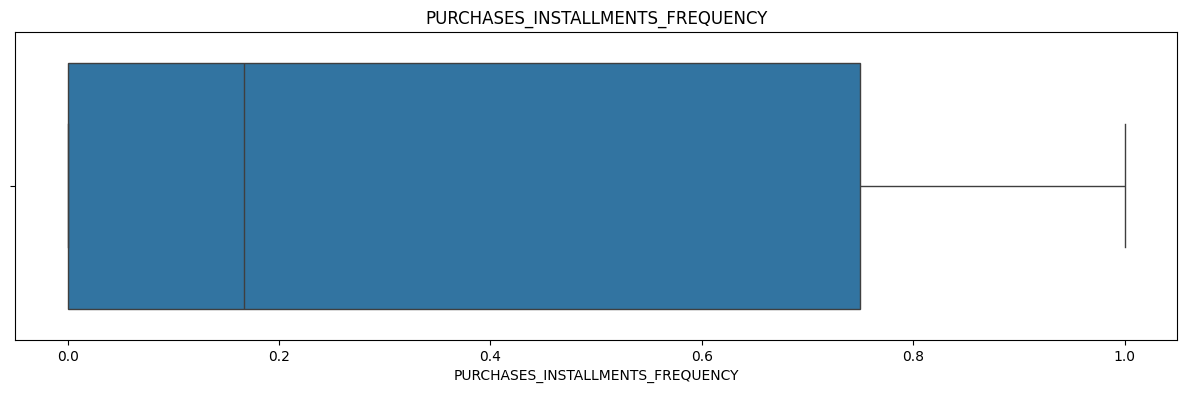

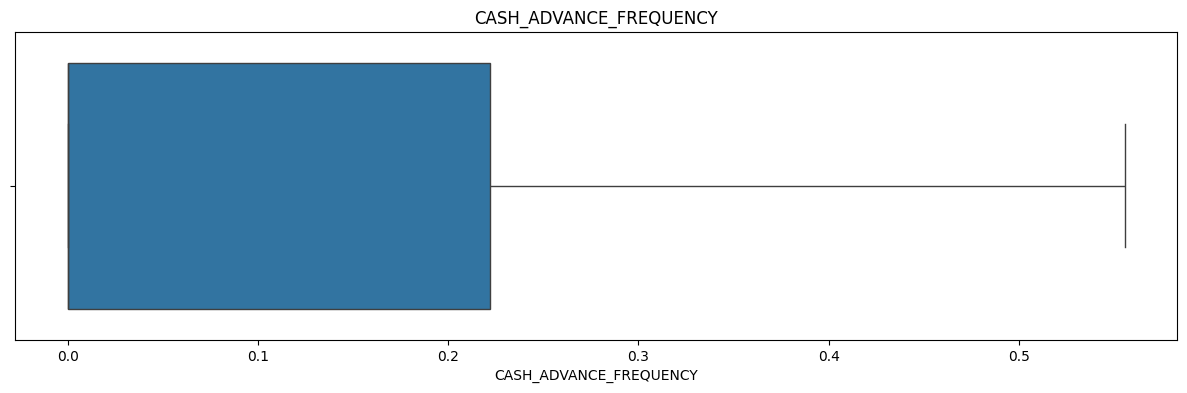

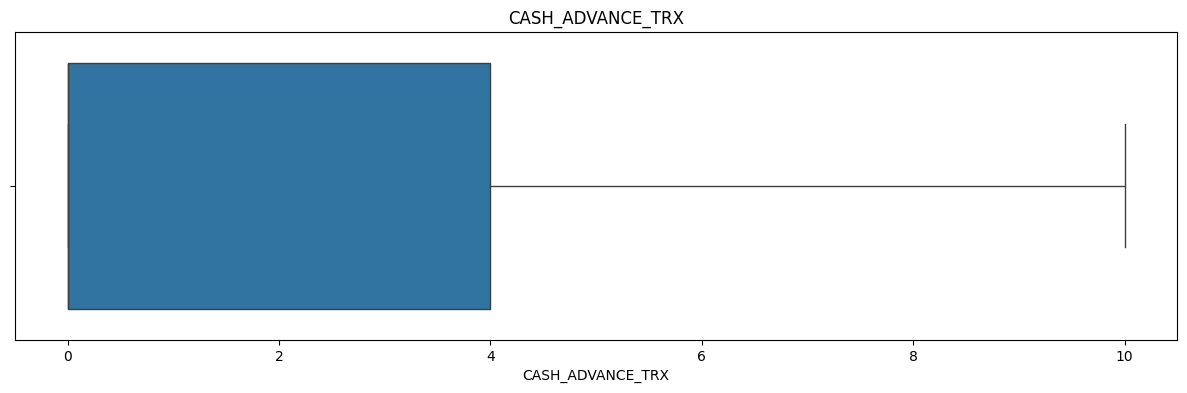

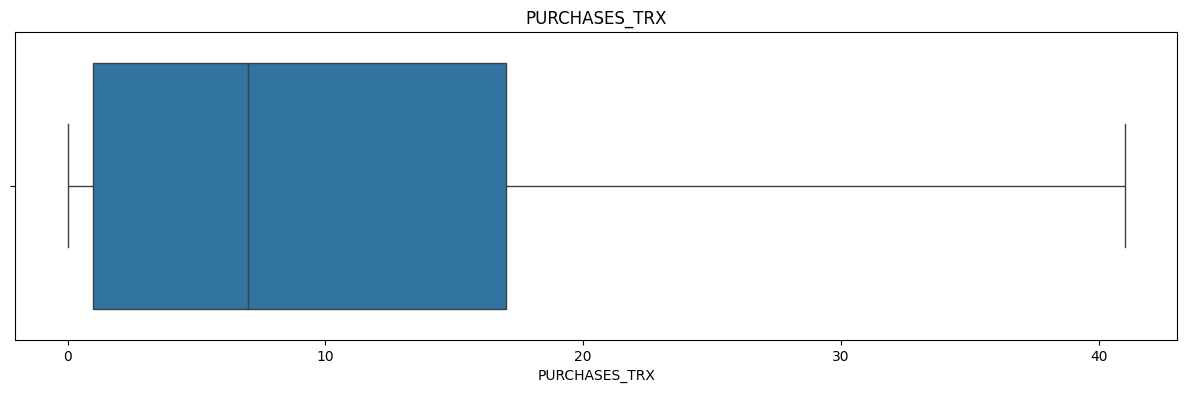

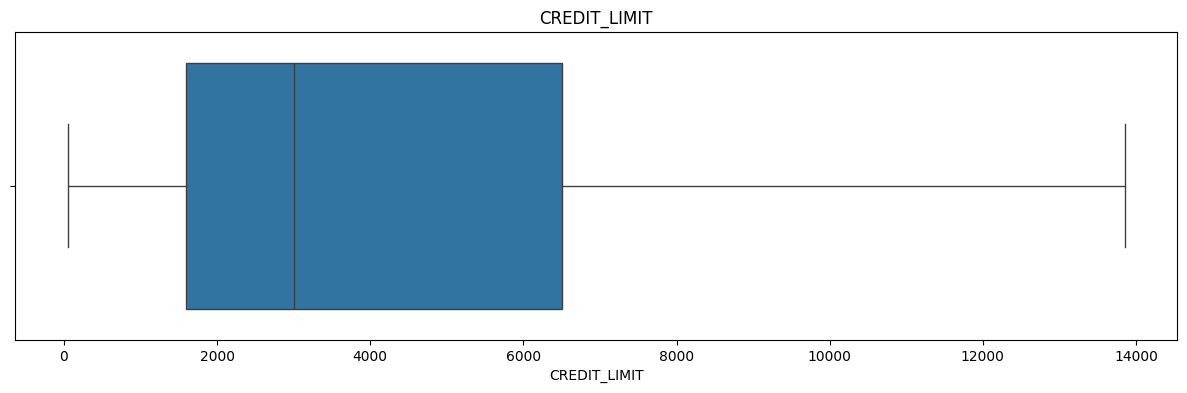

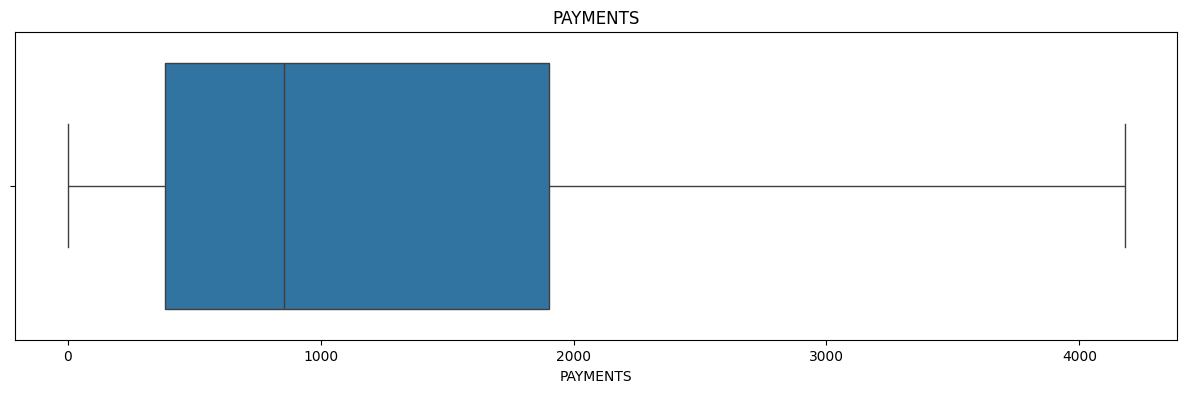

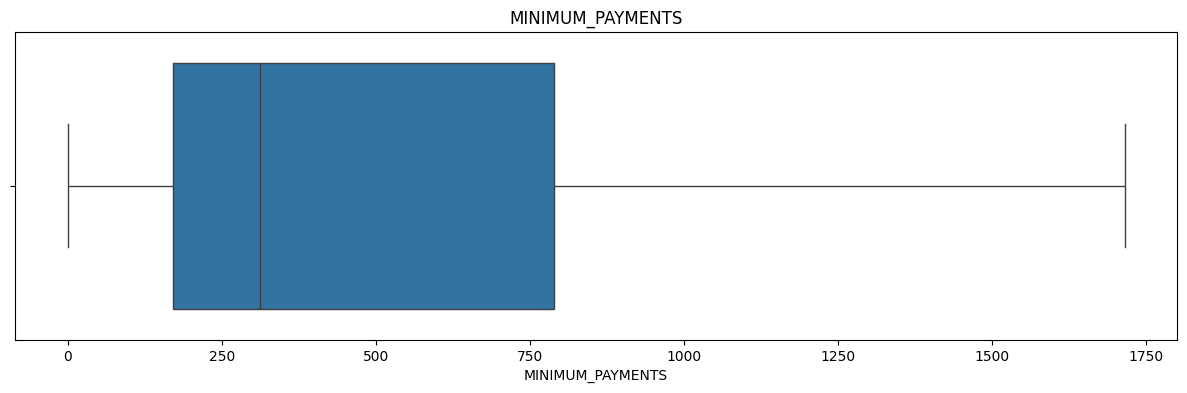

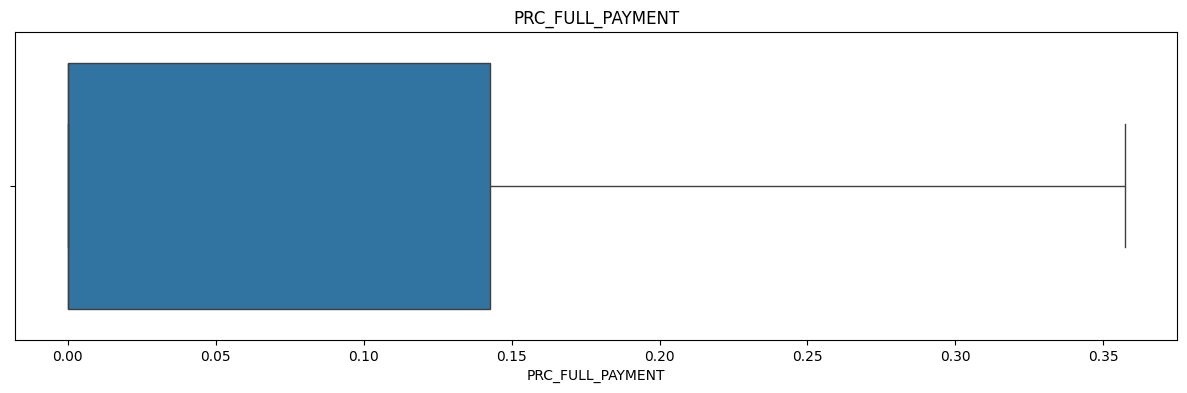

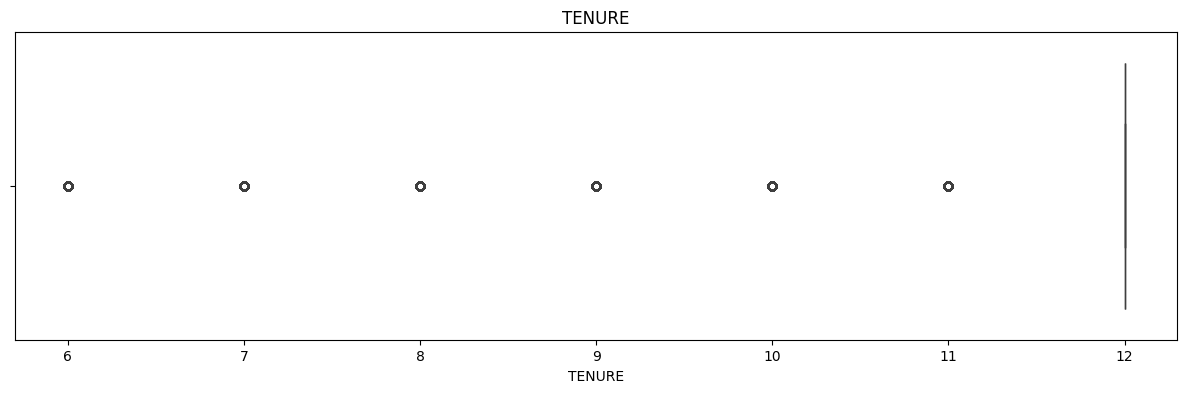

In [27]:
# Megecek kembali outlier menggunakan boxplot
for i in df[numerical_col]:
    plt.figure(figsize=(15,4))
    plt.title(i)
    ax = sns.boxplot(x=df[numerical_col][i])

 # __E. EXPLORATORY DATA ANALYSIS (EDA)__
----------------------------
    Exploratory Data Analysis (EDA) merupakan metode eksplorasi data dengan menggunakan teknik aritmatika sederhana dan teknik grafis dalam meringkas data pengamatan. Bagian ini berisi eksplorasi data pada dataset di atas dengan menggunakan query, grouping, visualisasi sederhana, dan lain sebagainya.

## 1. Melihat Describe Data

In [28]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000,8949.000000
mean,1390.697731,0.931610,737.218384,354.518008,295.582267,672.536861,0.490405,0.184794,0.364478,0.126057,2.383283,11.625098,4419.295802,1347.265509,556.812310,0.087233,11.517935
std,1537.637836,0.110968,879.519446,512.094173,396.198058,998.586486,0.401360,0.255675,0.397451,0.172686,3.418038,13.041795,3383.944461,1272.869575,532.171556,0.138621,1.337134
min,0.000000,0.722223,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.365782,0.888889,39.800000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.282850,170.875613,0.000000,12.000000
50%,873.680279,1.000000,361.490000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,857.062706,312.343947,0.000000,12.000000
75%,2054.372848,1.000000,1110.170000,577.830000,468.650000,1113.868654,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.279320,788.721609,0.142857,12.000000
max,4943.383447,1.000000,2715.725000,1444.575000,1171.625000,2784.671635,1.000000,0.750000,1.000000,0.555555,10.000000,41.000000,13850.000000,4178.274025,1715.490603,0.357143,12.000000


**``Analysis Isi Features: ``**

- Rata-rata saldo yang tersisa sebesar 1390.7, dengan angka saldo terbesar adalah 4943.38 dan angka saldo terkecil adalah 0 (tidak ada sisa saldo).
- Rata-rata jumlah purchase yang dilakukan sebanyak 737 kali, paling banyak purchase sekitar 2716 dan bahkan ada yang tidak melakukan pembelian sama sekali
- Jumlah pembelian maksimum yang dilakukan dalam 1 kali transaksi sebanyak 1445 kali dengan rata-rata sebanyak 354 kali
- Jumlah pembelian yang dilakukan dengan cicilan dilakukan sebanyak 1172 kali pembelian dengan rata-rata sebanyak 296 kali
- Rata-rata limit kartu kredit oleh pengguna sebesar 4419.3, paling tinggi sebesar 13850 dan paling rendah sebesar 50
- Jumlah payments oleh pengguna rata-rata sebanyak 1347.27
- Jumlah minimum pembayaran yang dilakukan sebesar 0.019
- Jangka waktu layanan kartu kredit dimulai selama 6 bulan dan paling lama selama 12 bulan

untuk detail feature lainnya dapat dilihat pada deskripsi ringkasan tabel di atas

In [29]:
df.loc[df['TENURE'] == 12, 'PURCHASES'].agg(('min', 'max'))

min       0.000
max    2715.725
Name: PURCHASES, dtype: float64

Text(0.5, 1.0, 'Credit Limit vs Balance')

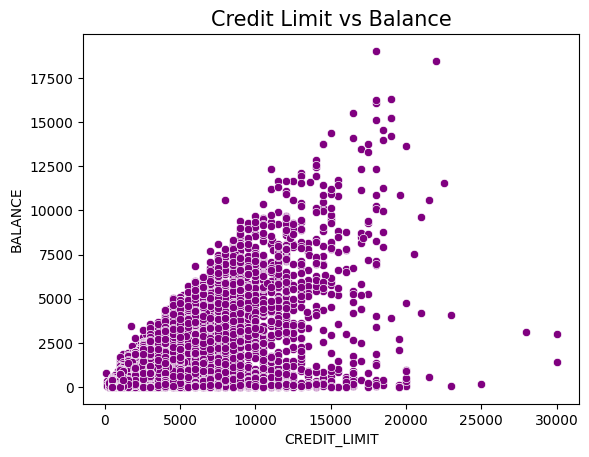

In [30]:
sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=df1, color='purple')
plt.title("Credit Limit vs Balance", fontsize= 15)

Text(0.5, 1.0, 'Credit Limit vs Balance')

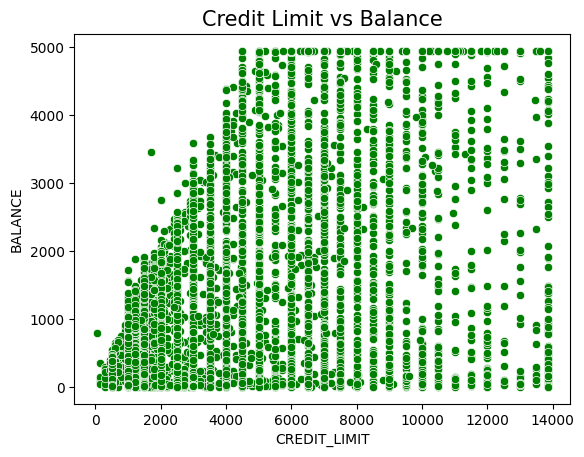

In [31]:
sns.scatterplot(x='CREDIT_LIMIT', y='BALANCE', data=df, color='green')
plt.title("Credit Limit vs Balance", fontsize= 15)

Scatter plot di atas menunjukkan bahwa saat nilai variabel meningkat, varians distribusi juga ikut meningkat hingga membentuk seperti kerucut. Oleh karenanya, didapatkan bahwa terdapat korelasi positif antara CREDIT LIMIT dengan BALANCE.

**`a). Melihat Banyaknya Pembelian yang Dilakukan oleh Pengguna Berdasarkan Tenure`**

In [32]:
eda = df[['PURCHASES', 'TENURE']]
eda = eda.groupby('TENURE').agg(MIN=('PURCHASES', 'min'), AVG=('PURCHASES', 'mean'), MAX=('PURCHASES', 'max')).reset_index()

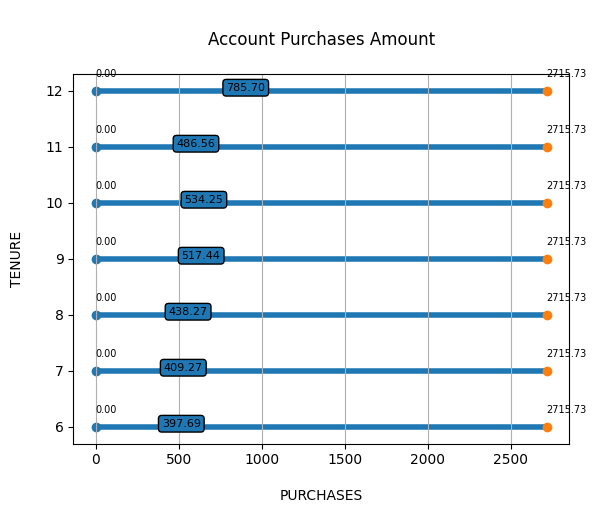

In [33]:
tenure = sorted(df['TENURE'].unique())
min_sct = plt.scatter(x=eda['MIN'], y=eda['TENURE'])
max_sct = plt.scatter(x=eda['MAX'], y=eda['TENURE'])
for i in range(len(tenure)):
    eda_x = eda[eda['TENURE']==tenure[i]]
    plt.hlines(y=eda_x['TENURE'], xmin=eda_x['MIN'], xmax=eda_x['MAX'], linewidth=4, zorder=0)
    plt.annotate('{0:.2f}'.format(eda_x['MIN'].values[0]), xy=(eda_x['MIN'].values[0], eda_x['TENURE'].values[0]+0.25), fontsize=7)
    plt.annotate('{0:.2f}'.format(eda_x['AVG'].values[0]), xy=(eda_x['AVG'].values[0], eda_x['TENURE'].values[0]), fontsize=8, bbox=dict(boxstyle='round', pad=0.3))
    plt.annotate('{0:.2f}'.format(eda_x['MAX'].values[0]), xy=(eda_x['MAX'].values[0], eda_x['TENURE'].values[0]+0.25), fontsize=7)
#for spine in axs_left.spines.values():
#    spine.set_color('None')
plt.xlabel('\nPURCHASES')
plt.ylabel('TENURE\n')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', alpha=0)
plt.grid(axis='x', which='major')
plt.title('\nAccount Purchases Amount\n')
plt.show()

Dapat dilihat pada chart di atas, sehingga dapat disimpulkan bahwa rata-rata pembelian tertinggi adalah pengguna yang memilih jangka waktu pembayaran layanan kartu kredit (TENURE) selama 12 bulan.

**`b). Melihat Analisis Korelasi (Hubungan) antar Features`**

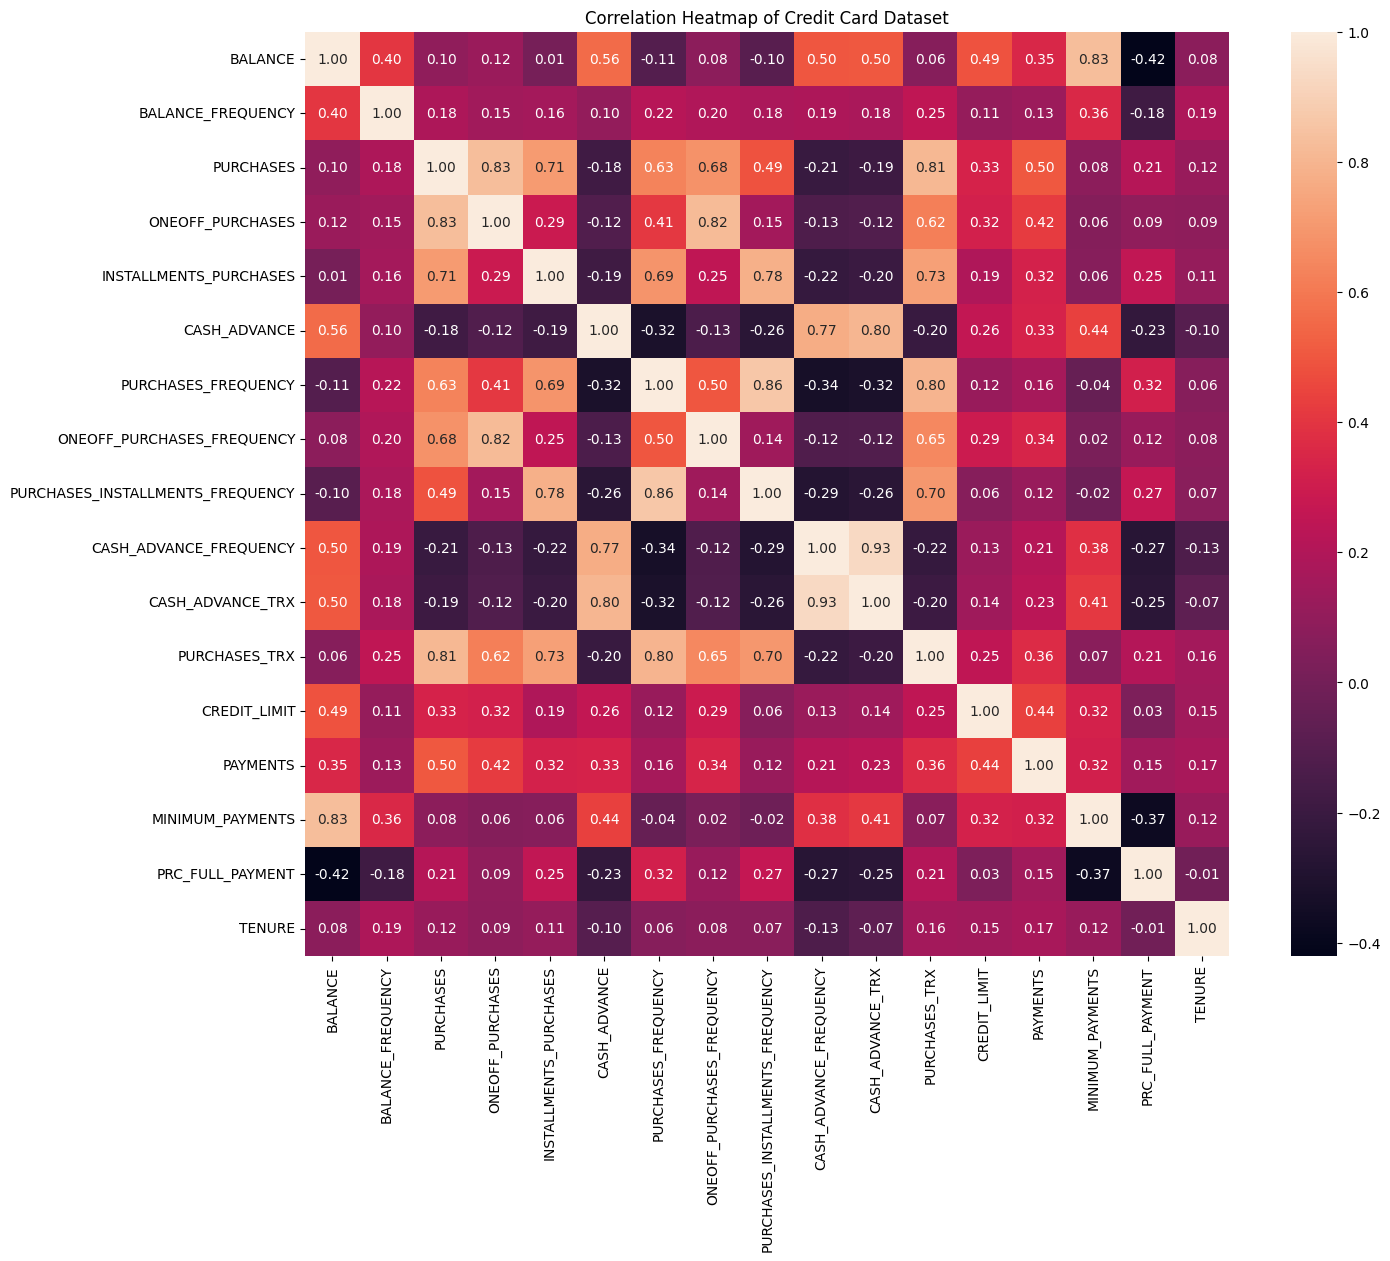

In [34]:
correlation = df.corr()
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Credit Card Dataset')
ax = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax.set_yticklabels(ax.get_yticklabels())           
plt.show()

CASH_ADVANCE_FREQUENCY memiliki korelasi positif tertinggi dengan CASH_ADVANCE_TRX, kemudian korelasi terkuat selanjutnya diikuit oleh PURCHASES_FREQUENCY dengan PURCHASES_INSTALLMENTS_FREQUENCY, BALANCE dengan MINIMUM_PAYMENTS, PURCHASES dengan ONEOFF_PURCHASES, ONEOFF_PURCHASES dengan ONEOFF_PURCHASES_FREQUENCY, PURCHASES dengan PURCHASES_TRX

Sebelebihnya dapat dilihat pada visualisasi korelasi heatmap di atas

# __F. DATA PREPROCESSING__
-----------------------------------------------------------



In [35]:
df1.nunique()

BALANCE                             8870
BALANCE_FREQUENCY                     43
PURCHASES                           6203
ONEOFF_PURCHASES                    4014
INSTALLMENTS_PURCHASES              4452
CASH_ADVANCE                        4322
PURCHASES_FREQUENCY                   47
ONEOFF_PURCHASES_FREQUENCY            47
PURCHASES_INSTALLMENTS_FREQUENCY      47
CASH_ADVANCE_FREQUENCY                54
CASH_ADVANCE_TRX                      65
PURCHASES_TRX                        173
CREDIT_LIMIT                         205
PAYMENTS                            8710
MINIMUM_PAYMENTS                    8635
PRC_FULL_PAYMENT                      47
TENURE                                 7
dtype: int64

In [36]:
df1

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,312.343947,0.000000,6
8947,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [37]:
# Standardize data
scaler = StandardScaler() 
data_train = scaler.fit_transform(df.values)
data_train.shape

(8949, 17)

In [38]:
# Statistics of scaled data
data_train = pd.DataFrame(data_train, columns=df.columns)
data_train.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,-0.877887,-1.022232,-0.729778,-0.692329,-0.505286,-0.673526,-0.806649,-0.722810,-0.707409,-0.730019,-0.697305,-0.738061,-1.010503,-0.899957,-0.784194,-0.629326,0.360541
1,1.178347,-0.202948,-0.838253,-0.692329,-0.746088,2.115243,-1.221928,-0.722810,-0.917090,0.717780,0.473022,-0.891422,0.762675,2.165124,0.968779,0.973858,0.360541
2,0.718318,0.616337,0.040879,0.817575,-0.746088,-0.673526,1.269742,2.210769,-0.917090,-0.730019,-0.697305,0.028748,0.910439,-0.569767,0.132432,-0.629326,0.360541
3,0.179488,-1.887032,0.866182,2.128745,-0.746088,-0.467436,-1.014290,-0.396858,-0.917090,-0.247421,-0.404724,-0.814741,0.910439,-1.058507,-0.459405,-0.629326,0.360541
4,-0.372660,0.616337,-0.820060,-0.661083,-0.746088,-0.673526,-1.014290,-0.396858,-0.917090,-0.730019,-0.697305,-0.814741,-0.951397,-0.525559,-0.586349,-0.629326,0.360541


In [39]:
# Melihat penggabungan cluster menggunakan Dendrogram
HC = linkage(data_train, method='ward')

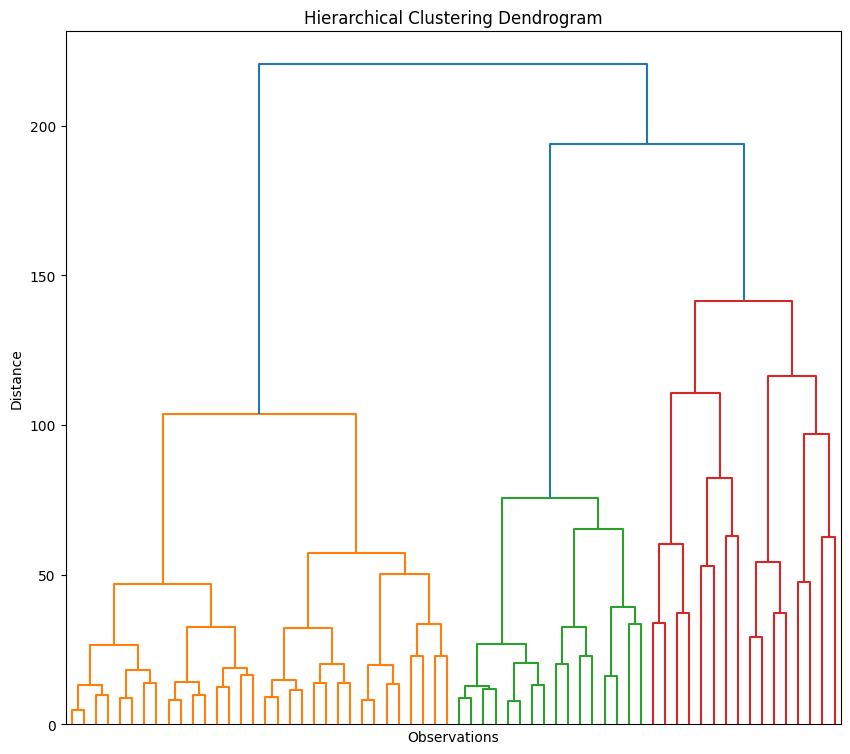

In [40]:
plt.figure(figsize=(10,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(HC, truncate_mode='level', p = 5, show_leaf_counts=False, no_labels=True)
plt.show()

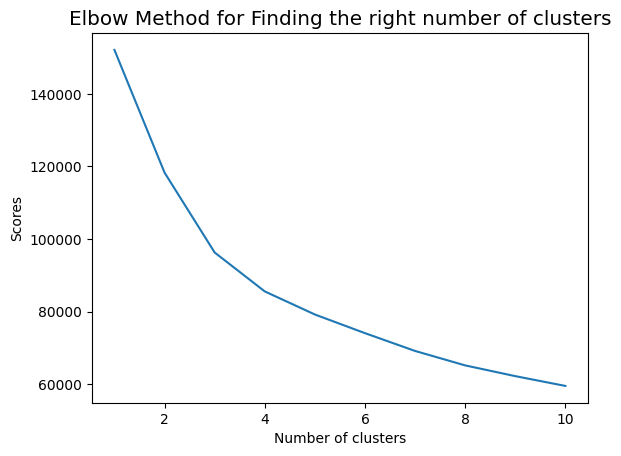

In [41]:
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(data_train)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.style.use('ggplot')
plt.title('Elbow Method for Finding the right number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Scores') 
plt.show()

Dapat dilihat dari grafik elbow di atas menunjukkan bahwa dari cluster 1 sampai 4 nilai inersia mengalami penurunan yang sangat signifikan (tajam), dan setelah cluster ke 4 nilai inersianya terus-menurun konstan. Sehingga dapat diambil keputusan yang awalnya akan dibentuk sebanyak 5 cluster akan diubah berdasarkan elbow method bahwa cluster optimalnya adalah sebanyak 4 cluster (kelompok).

Text(0, 0.5, 'Distance')

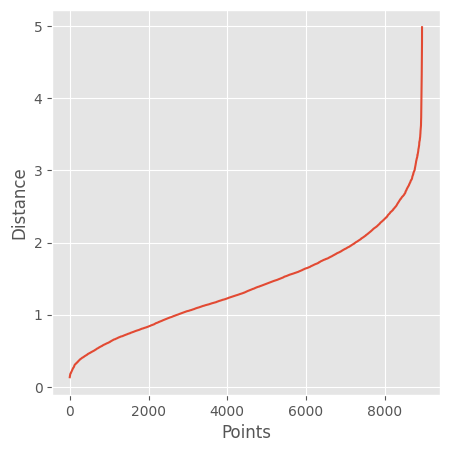

In [42]:
# Mencari nilai epsilon untuk klasterisasi menggunakan DBScan
from sklearn.neighbors import NearestNeighbors

nearest_neighbors = NearestNeighbors(n_neighbors=36)
neighbors = nearest_neighbors.fit(data_train)

distances, indices = neighbors.kneighbors(data_train)
distances = np.sort(distances[:,10], axis=0)

fig = plt.figure(figsize=(5, 5))
plt.plot(distances)
plt.xlabel("Points")
plt.ylabel("Distance")

2.1683331378685944


<Figure size 500x500 with 0 Axes>

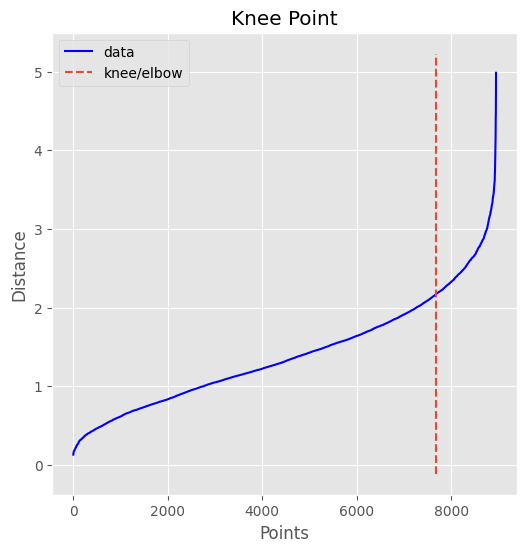

In [43]:
from kneed import KneeLocator

i = np.arange(len(distances))
knee = KneeLocator(i, distances, S=1, curve='convex', direction='increasing', interp_method='polynomial')

fig = plt.figure(figsize=(5, 5))
knee.plot_knee()
plt.xlabel("Points")
plt.ylabel("Distance")

print(distances[knee.knee])

# G. PENDEFINISIAN DATA
--------------------------

## 1. K-MEANS CLUSTERING

In [44]:
X = data_train.values

In [45]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [46]:
y_kmeans

array([0, 1, 2, ..., 3, 0, 0])

In [47]:
kmeans_data= data_train.copy()
kmeans_data['KMeansSegment']= kmeans.labels_

In [48]:
kmeans_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeansSegment
0,-0.877887,-1.022232,-0.729778,-0.692329,-0.505286,-0.673526,-0.806649,-0.722810,-0.707409,-0.730019,-0.697305,-0.738061,-1.010503,-0.899957,-0.784194,-0.629326,0.360541,0
1,1.178347,-0.202948,-0.838253,-0.692329,-0.746088,2.115243,-1.221928,-0.722810,-0.917090,0.717780,0.473022,-0.891422,0.762675,2.165124,0.968779,0.973858,0.360541,1
2,0.718318,0.616337,0.040879,0.817575,-0.746088,-0.673526,1.269742,2.210769,-0.917090,-0.730019,-0.697305,0.028748,0.910439,-0.569767,0.132432,-0.629326,0.360541,2
3,0.179488,-1.887032,0.866182,2.128745,-0.746088,-0.467436,-1.014290,-0.396858,-0.917090,-0.247421,-0.404724,-0.814741,0.910439,-1.058507,-0.459405,-0.629326,0.360541,0
4,-0.372660,0.616337,-0.820060,-0.661083,-0.746088,-0.673526,-1.014290,-0.396858,-0.917090,-0.730019,-0.697305,-0.814741,-0.951397,-0.525559,-0.586349,-0.629326,0.360541,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.885957,0.616337,-0.507235,-0.692329,-0.011263,-0.673526,1.269742,-0.722810,1.179720,-0.730019,-0.697305,-0.431337,-1.010503,-0.802697,-0.954494,1.947220,-4.126919,3
8945,-0.892012,0.616337,-0.497138,-0.692329,0.011151,-0.673526,1.269742,-0.722810,1.179720,-0.730019,-0.697305,-0.431337,-1.010503,-0.841770,-0.459405,-0.629326,-4.126919,3
8946,-0.889270,-0.885689,-0.674063,-0.692329,-0.381604,-0.673526,0.854463,-0.722810,0.760359,-0.730019,-0.697305,-0.508018,-1.010503,-0.994655,-0.891480,1.174258,-4.126919,3
8947,-0.895736,-0.885689,-0.838253,-0.692329,-0.746088,-0.636914,-1.221928,-0.722810,-0.917090,0.235182,-0.112142,-0.891422,-1.158268,-1.017220,-0.941585,1.174258,-4.126919,0


In [49]:
kmeans_data['Labels'] = kmeans_data['KMeansSegment'].map({0:'Klaster 1', 
                                                           1:'Klaster 2', 
                                                           2:'Klaster 3', 
                                                           3:'Klaster 4'})
kmeans_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeansSegment,Labels
0,-0.877887,-1.022232,-0.729778,-0.692329,-0.505286,-0.673526,-0.806649,-0.722810,-0.707409,-0.730019,-0.697305,-0.738061,-1.010503,-0.899957,-0.784194,-0.629326,0.360541,0,Klaster 1
1,1.178347,-0.202948,-0.838253,-0.692329,-0.746088,2.115243,-1.221928,-0.722810,-0.917090,0.717780,0.473022,-0.891422,0.762675,2.165124,0.968779,0.973858,0.360541,1,Klaster 2
2,0.718318,0.616337,0.040879,0.817575,-0.746088,-0.673526,1.269742,2.210769,-0.917090,-0.730019,-0.697305,0.028748,0.910439,-0.569767,0.132432,-0.629326,0.360541,2,Klaster 3
3,0.179488,-1.887032,0.866182,2.128745,-0.746088,-0.467436,-1.014290,-0.396858,-0.917090,-0.247421,-0.404724,-0.814741,0.910439,-1.058507,-0.459405,-0.629326,0.360541,0,Klaster 1
4,-0.372660,0.616337,-0.820060,-0.661083,-0.746088,-0.673526,-1.014290,-0.396858,-0.917090,-0.730019,-0.697305,-0.814741,-0.951397,-0.525559,-0.586349,-0.629326,0.360541,0,Klaster 1


## 2. DBSCAN CLUSTERING

In [50]:
dbscan_cluster = DBSCAN(eps=2.205317994585644, min_samples=36)
y_dbscan= dbscan_cluster.fit(X)

In [51]:
dbscan_data= data_train.copy()
dbscan_data['DBSCANSegemnt']= dbscan_cluster.labels_

In [52]:
dbscan_data.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,DBSCANSegemnt
0,-0.877887,-1.022232,-0.729778,-0.692329,-0.505286,-0.673526,-0.806649,-0.722810,-0.707409,-0.730019,-0.697305,-0.738061,-1.010503,-0.899957,-0.784194,-0.629326,0.360541,0
1,1.178347,-0.202948,-0.838253,-0.692329,-0.746088,2.115243,-1.221928,-0.722810,-0.917090,0.717780,0.473022,-0.891422,0.762675,2.165124,0.968779,0.973858,0.360541,0
2,0.718318,0.616337,0.040879,0.817575,-0.746088,-0.673526,1.269742,2.210769,-0.917090,-0.730019,-0.697305,0.028748,0.910439,-0.569767,0.132432,-0.629326,0.360541,0
3,0.179488,-1.887032,0.866182,2.128745,-0.746088,-0.467436,-1.014290,-0.396858,-0.917090,-0.247421,-0.404724,-0.814741,0.910439,-1.058507,-0.459405,-0.629326,0.360541,0
4,-0.372660,0.616337,-0.820060,-0.661083,-0.746088,-0.673526,-1.014290,-0.396858,-0.917090,-0.730019,-0.697305,-0.814741,-0.951397,-0.525559,-0.586349,-0.629326,0.360541,0


In [53]:
dbscan_data['DBSCANSegemnt'].unique()

array([ 0, -1], dtype=int64)

In [54]:
from collections import Counter

In [55]:
Counter(dbscan_data['DBSCANSegemnt'])

Counter({0: 8017, -1: 932})

# I. EVALUASI MODEL

In [56]:
kmeans_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,KMeansSegment,Labels
0,-0.877887,-1.022232,-0.729778,-0.692329,-0.505286,-0.673526,-0.806649,-0.722810,-0.707409,-0.730019,-0.697305,-0.738061,-1.010503,-0.899957,-0.784194,-0.629326,0.360541,0,Klaster 1
1,1.178347,-0.202948,-0.838253,-0.692329,-0.746088,2.115243,-1.221928,-0.722810,-0.917090,0.717780,0.473022,-0.891422,0.762675,2.165124,0.968779,0.973858,0.360541,1,Klaster 2
2,0.718318,0.616337,0.040879,0.817575,-0.746088,-0.673526,1.269742,2.210769,-0.917090,-0.730019,-0.697305,0.028748,0.910439,-0.569767,0.132432,-0.629326,0.360541,2,Klaster 3
3,0.179488,-1.887032,0.866182,2.128745,-0.746088,-0.467436,-1.014290,-0.396858,-0.917090,-0.247421,-0.404724,-0.814741,0.910439,-1.058507,-0.459405,-0.629326,0.360541,0,Klaster 1
4,-0.372660,0.616337,-0.820060,-0.661083,-0.746088,-0.673526,-1.014290,-0.396858,-0.917090,-0.730019,-0.697305,-0.814741,-0.951397,-0.525559,-0.586349,-0.629326,0.360541,0,Klaster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.885957,0.616337,-0.507235,-0.692329,-0.011263,-0.673526,1.269742,-0.722810,1.179720,-0.730019,-0.697305,-0.431337,-1.010503,-0.802697,-0.954494,1.947220,-4.126919,3,Klaster 4
8945,-0.892012,0.616337,-0.497138,-0.692329,0.011151,-0.673526,1.269742,-0.722810,1.179720,-0.730019,-0.697305,-0.431337,-1.010503,-0.841770,-0.459405,-0.629326,-4.126919,3,Klaster 4
8946,-0.889270,-0.885689,-0.674063,-0.692329,-0.381604,-0.673526,0.854463,-0.722810,0.760359,-0.730019,-0.697305,-0.508018,-1.010503,-0.994655,-0.891480,1.174258,-4.126919,3,Klaster 4
8947,-0.895736,-0.885689,-0.838253,-0.692329,-0.746088,-0.636914,-1.221928,-0.722810,-0.917090,0.235182,-0.112142,-0.891422,-1.158268,-1.017220,-0.941585,1.174258,-4.126919,0,Klaster 1


In [57]:
dbscan_data

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,DBSCANSegemnt
0,-0.877887,-1.022232,-0.729778,-0.692329,-0.505286,-0.673526,-0.806649,-0.722810,-0.707409,-0.730019,-0.697305,-0.738061,-1.010503,-0.899957,-0.784194,-0.629326,0.360541,0
1,1.178347,-0.202948,-0.838253,-0.692329,-0.746088,2.115243,-1.221928,-0.722810,-0.917090,0.717780,0.473022,-0.891422,0.762675,2.165124,0.968779,0.973858,0.360541,0
2,0.718318,0.616337,0.040879,0.817575,-0.746088,-0.673526,1.269742,2.210769,-0.917090,-0.730019,-0.697305,0.028748,0.910439,-0.569767,0.132432,-0.629326,0.360541,0
3,0.179488,-1.887032,0.866182,2.128745,-0.746088,-0.467436,-1.014290,-0.396858,-0.917090,-0.247421,-0.404724,-0.814741,0.910439,-1.058507,-0.459405,-0.629326,0.360541,0
4,-0.372660,0.616337,-0.820060,-0.661083,-0.746088,-0.673526,-1.014290,-0.396858,-0.917090,-0.730019,-0.697305,-0.814741,-0.951397,-0.525559,-0.586349,-0.629326,0.360541,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8944,-0.885957,0.616337,-0.507235,-0.692329,-0.011263,-0.673526,1.269742,-0.722810,1.179720,-0.730019,-0.697305,-0.431337,-1.010503,-0.802697,-0.954494,1.947220,-4.126919,0
8945,-0.892012,0.616337,-0.497138,-0.692329,0.011151,-0.673526,1.269742,-0.722810,1.179720,-0.730019,-0.697305,-0.431337,-1.010503,-0.841770,-0.459405,-0.629326,-4.126919,0
8946,-0.889270,-0.885689,-0.674063,-0.692329,-0.381604,-0.673526,0.854463,-0.722810,0.760359,-0.730019,-0.697305,-0.508018,-1.010503,-0.994655,-0.891480,1.174258,-4.126919,0
8947,-0.895736,-0.885689,-0.838253,-0.692329,-0.746088,-0.636914,-1.221928,-0.722810,-0.917090,0.235182,-0.112142,-0.891422,-1.158268,-1.017220,-0.941585,1.174258,-4.126919,0


In [58]:
pca = PCA(n_components=2)
PrincipalComponents = pca.fit_transform(data_train)
PrincipalComponents

array([[-1.63716682, -2.37074949],
       [-2.15117814,  2.3497799 ],
       [ 1.19819349,  0.30155685],
       ...,
       [-0.47786829, -2.98788057],
       [-2.43236824, -2.46126824],
       [ 0.17198228, -0.93357345]])

In [59]:
data_pca=pd.DataFrame(data=PrincipalComponents, columns=['pca1','pca2'])
data_pca.head()

,pca1,pca2
0,-1.637167,-2.370749
1,-2.151178,2.349780
2,1.198193,0.301557
3,-0.468785,-0.538057
4,-1.642128,-1.575636


In [60]:
data_pca = pd.concat([data_pca,kmeans_data.KMeansSegment], axis = 1)
data_pca.head(10)

,pca1,pca2,KMeansSegment
0,-1.637167,-2.370749,0
1,-2.151178,2.349780,1
2,1.198193,0.301557,2
3,-0.468785,-0.538057,0
4,-1.642128,-1.575636,0
5,1.031957,0.187005,3
6,5.789393,0.978279,2
7,0.766660,-1.002613,3
8,0.002334,-0.700891,0
9,0.073837,-0.945537,0


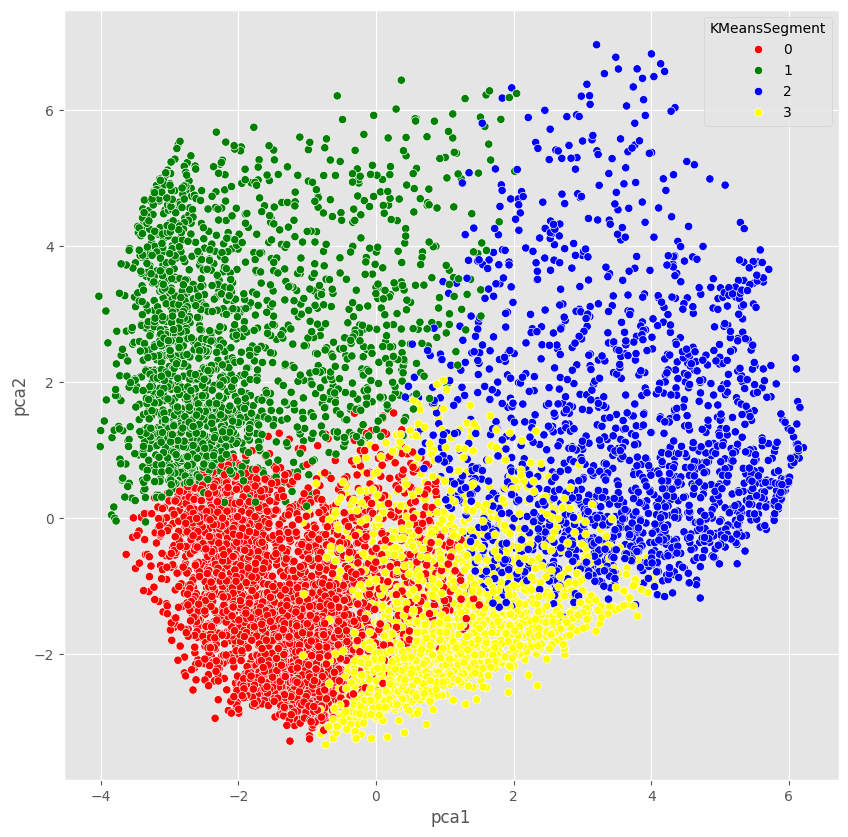

In [61]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "KMeansSegment", data = data_pca, palette =['red','green','blue','yellow'])
plt.show()

In [62]:
pcadbscan = PCA(n_components=2)
PrincipalComponentsdbscan = pcadbscan.fit_transform(data_train)
PrincipalComponentsdbscan

array([[-1.63716674, -2.37074943],
       [-2.15117867,  2.34977945],
       [ 1.1981941 ,  0.30155759],
       ...,
       [-0.47786876, -2.98788095],
       [-2.43236795, -2.46126814],
       [ 0.17198282, -0.93357309]])

In [63]:
data_pca=pd.DataFrame(data=PrincipalComponentsdbscan, columns=['pca1','pca2'])
data_pca.head()

,pca1,pca2
0,-1.637167,-2.370749
1,-2.151179,2.349779
2,1.198194,0.301558
3,-0.468787,-0.538059
4,-1.642128,-1.575636


In [64]:
data_pcadbscan = pd.concat([data_pca,dbscan_data.DBSCANSegemnt], axis = 1)
data_pcadbscan.head(10)

,pca1,pca2,DBSCANSegemnt
0,-1.637167,-2.370749,0
1,-2.151179,2.349779,0
2,1.198194,0.301558,0
3,-0.468787,-0.538059,0
4,-1.642128,-1.575636,0
5,1.031959,0.187006,0
6,5.789393,0.978279,0
7,0.766659,-1.002614,0
8,0.002333,-0.700891,0
9,0.073836,-0.945538,0


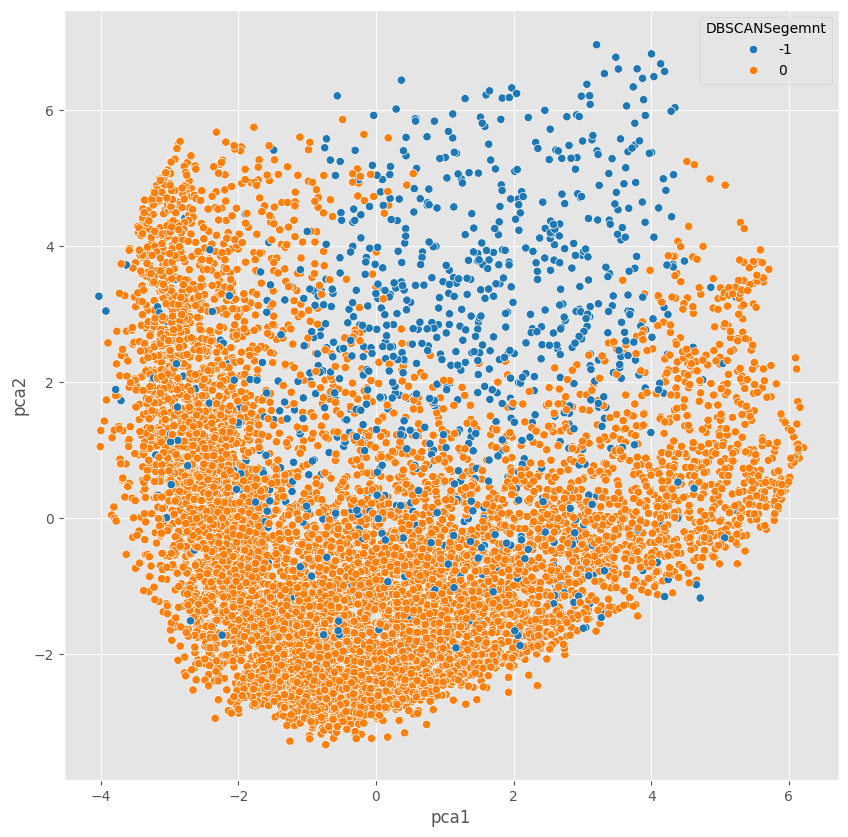

In [65]:
plt.figure(figsize=(10,10))
plt.style.use('ggplot')
ax = sns.scatterplot(x="pca1", y="pca2", hue = "DBSCANSegemnt", data = data_pcadbscan, palette='tab10')
plt.show()

# I. EVALUASI MODEL
________________________________________

Evaluasi model adalah menguji akurasi data testing menggunakan evaluasi model setelah Pelatihan Model. Evaluasi menggunakan metode Logistic Regression, K-Nearest Neighbors, Support Virtual Machine, Decision Tree, Random Forest, dan Naive Bayes sebagai berikut:

1. Akurasi (Accuracy): Akurasi mengukur sejauh mana model benar dalam mengklasifikasikan data. Ini adalah metrik umum untuk masalah klasifikasi.
2. Melihat Akurasi model.
3. Melihat harga hasil prediksi dan perbandingan dengan harga aktual.
4. Membuat visualisasi regresi masing-masing kondisi.

# J. MODEL INFERENCE
-------------------------------------


In [66]:
model_inference = {'Balance': [370.708],
                   'Balance_Frequency': [0.722223],
                   'Purchases': [1083.25],
                   'One_Off_Purchases': [1083.250],
                   'Installments_Purchases': [0],
                   'Cash_Advance': [204.040],
                   'Purchases_Frequency': [0.667],
                   'One_Off_Purchases_Frequency': [0.667],
                   'Purchases_Installment_Frequency': [0],
                   'Cash_Advance_Frequency': [0.333],
                   'Cash_Advance_trx': [2],
                   'Purchase_trx': [23],
                   'Credit_Limit': [1200],
                   'Payments': [60.165],
                   'Minumum_Payments': [90.289],
                   'Price_Full_Payment': [0.25],
                   'Tenure': [12]}

dt_trial = pd.DataFrame(model_inference)

In [67]:
dt_trial

,Balance,Balance_Frequency,Purchases,One_Off_Purchases,Installments_Purchases,Cash_Advance,Purchases_Frequency,One_Off_Purchases_Frequency,Purchases_Installment_Frequency,Cash_Advance_Frequency,Cash_Advance_trx,Purchase_trx,Credit_Limit,Payments,Minumum_Payments,Price_Full_Payment,Tenure
0,370.708,0.722223,1083.25,1083.25,0,204.04,0.667,0.667,0,0.333,2,23,1200,60.165,90.289,0.25,12


In [68]:
# Standardize data
feature = scaler.fit_transform(dt_trial.values)
feature.shape

(1, 17)

In [69]:
feature.reshape(17,)

print(feature)

predict=kmeans.predict(feature)

if predict == 0:
    print('Berdasarkan analisa, pengguna masuk ke dalam cluster 1')
elif predict == 1:
    print('Berdasarkan analisa, pengguna masuk ke dalam cluster 2')
elif predict == 2:
    print('Berdasarkan analisa, pengguna masuk ke dalam cluster 3')
elif predict == 3:
    print('Berdasarkan analisa, pengguna masuk ke dalam cluster 4')

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Berdasarkan analisa, pengguna masuk ke dalam cluster 1


# K. Pengambilan Kesimpulan
-----------------------------------------------------
Pada final project ini dilakukan penerapan konsep clustering dimana menggunakan beberapa algoritma pada dataset transaksi pengguna kartu kredit. Berikut dapat diambil beberapa analisis dan kesimpulan yang diperoleh.

=========================================================
--------------------------------------
Deskripsi Model Clustering
--------------------------------------
Model clustering adalah metode analisis data yang digunakan untuk mengelompokkan objek atau data menjadi kelompok-kelompok yang serupa berdasarkan kesamaan karakteristik atau pola yang dimiliki. Tujuan utama dari model clustering adalah mengidentifikasi struktur yang tersembunyi dalam data tanpa adanya label kelas atau informasi sebelumnya.

Berdasarkan model clustering yang telah dibuat menggunakan dataset "CC GENERAL.CSV", berikut adalah analisis informasi yang dapat diperoleh:

Segmentasi Pelanggan: Model clustering telah mengelompokkan data pelanggan ke dalam beberapa cluster berdasarkan fitur-fitur yang ada dalam dataset. Setiap cluster mewakili kelompok pelanggan dengan karakteristik yang serupa. Informasi ini dapat digunakan untuk melakukan segmentasi pelanggan yang memungkinkan untuk menyesuaikan strategi pemasaran dan layanan yang lebih spesifik untuk setiap kelompok.

Pola Pengelompokan: Melalui analisis clustering, dapat ditemukan pola pengelompokan yang mencerminkan kecenderungan dan hubungan antara fitur-fitur dalam dataset. Misalnya, cluster-cluster yang terbentuk dapat mencerminkan perbedaan tingkat pengeluaran, kebiasaan pembayaran, atau aktivitas kartu kredit.

Karakteristik Cluster: Dalam setiap cluster, terdapat karakteristik yang membedakan dari cluster lainnya. Dengan menganalisis fitur-fitur yang memiliki perbedaan signifikan antara cluster, kita dapat mengidentifikasi fitur-fitur yang paling mempengaruhi pembentukan cluster.

Anomali atau Outlier: Melalui visualisasi hasil clustering, kita dapat mengidentifikasi titik-titik data yang tidak tergolong dalam salah satu cluster atau menjadi outlier. Identifikasi anomali ini dapat memberikan wawasan tambahan tentang pelanggan yang memiliki perilaku atau karakteristik yang unik atau tidak biasa. Hal ini dapat berguna dalam mengidentifikasi pelanggan potensial yang membutuhkan perhatian khusus atau tindakan lebih lanjut.

=========================================================
--------------------------------------
Kesimpulan Model Clustering
--------------------------------------
Terdapat 4 klaster yang dihasilkan berdasarkan hasil cluster optimal dari elbow method. Dimana masing-masing klaster memiliki representasi yang berbeda, untuk detailnya dapat dilihat pada poin berikut.

1. Cluster 1: Karakteristik pengguna pada cluster ini memiliki nilai rata-rata yang relatif rendah untuk sebagian besar atribut. Pengguna cenderung memiliki saldo kartu kredit yang rendah, frekuensi pembelian yang rendah, dan menggunakan fasilitas cash advance dengan frekuensi yang rendah. Mereka juga cenderung memiliki kredit limit yang rendah dan melakukan pembayaran minimum yang lebih rendah.

2. Cluster 2: Pengguna pada cluster ini memiliki nilai rata-rata yang sedang untuk atribut saldo kartu kredit, frekuensi pembelian, dan penggunaan fasilitas cash advance. Pengguna memiliki kredit limit yang sedang dan cenderung melakukan pembayaran yang lebih tinggi daripada klaster lainnya.

3. Cluster 3: Pengguna pada cluster ini memiliki saldo kartu kredit, frekuensi pembelian, dan penggunaan fasilitas cash advance yang rendah. Mereka juga cenderung memiliki kredit limit yang rendah dan melakukan pembayaran minimum yang rendah.

4. Cluster 4: Pengguna pada cluster ini memiliki saldo kartu kredit yang tinggi, frekuensi pembelian yang tinggi, dan menggunakan fasilitas cash advance dengan frekuensi yang tinggi. Mereka juga cenderung memiliki kredit limit yang tinggi dan melakukan pembayaran yang lebih tinggi.

=========================================================
--------------------------------------
Kemudian pada final project clustering ini selain menggunakan algoritma K-Means juga melakukan clustering dengan DBSCAN. Dimana dengan menggunakan DBSCAN ini terbentuk sebanyak 2 cluster berdasarkan hasil Knee point.

=========================================================
--------------------------------------
KESIMPULAN AKHIR
--------------------------------------------------------
Kesimpulan dari hasil klastering tersebut adalah terdapat perbedaan yang signifikan antara setiap klaster dalam hal pola penggunaan kartu kredit. Klaster 1 dan 3 cenderung memiliki penggunaan kartu kredit yang lebih rendah, sedangkan Klaster 2 dan 4 cenderung memiliki penggunaan kartu kredit yang lebih tinggi. Klaster 4 memiliki saldo kartu kredit yang lebih tinggi, frekuensi pembelian yang tinggi, dan lebih sering menggunakan fasilitas cash advance. Klaster 2 memiliki saldo kartu kredit yang tinggi namun frekuensi pembelian yang rendah. Klaster 1 dan 3 memiliki saldo kartu kredit dan penggunaan kartu kredit yang lebih rendah secara keseluruhan.
-----------------------------------------------------